In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
%matplotlib inline

In [3]:
# Pull in clean, merged dataset.

merged_df = pd.read_csv("Cleaned_Merged.csv", index_col=0, parse_dates=["Date"])
merged_df

,Date,Amazon_Adj_Close,Amazon_Vol,Apple_Adj_Close,Apple_Vol,Facebook_Adj_Close,Facebook_Vol,Google_Adj_Close,Google_Vol,Netflix_Adj_Close,Netflix_Vol,Int_Rate
0,1980-12-12,NaN,NaN,0.10,469033600.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44
1,1980-12-15,NaN,NaN,0.10,175884800.0,NaN,NaN,NaN,NaN,NaN,NaN,19.62
2,1980-12-16,NaN,NaN,0.09,105728000.0,NaN,NaN,NaN,NaN,NaN,NaN,20.45
3,1980-12-17,NaN,NaN,0.09,86441600.0,NaN,NaN,NaN,NaN,NaN,NaN,20.27
4,1980-12-18,NaN,NaN,0.09,73449600.0,NaN,NaN,NaN,NaN,NaN,NaN,20.74
...,...,...,...,...,...,...,...,...,...,...,...,...
10009,2020-08-31,NaN,NaN,129.04,225702700.0,NaN,NaN,1629.53,1321100.0,NaN,NaN,0.09
10010,2020-09-01,NaN,NaN,134.18,151948100.0,NaN,NaN,1655.08,1133800.0,NaN,NaN,0.09
10011,2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN,1717.39,2476100.0,NaN,NaN,0.09
10012,2020-09-03,NaN,NaN,NaN,NaN,NaN,NaN,1629.51,3180200.0,NaN,NaN,0.09


In [4]:
# Create annual dataframes for past 5 years of data (2015-2019) to make analysis easier
# Grabbing 2014 for end of year value to calculate 2015 stock return (EOY 2015 / EOY 2014)

merged2014_df = merged_df[
    (merged_df["Date"] >= "2014-1-1") & (merged_df["Date"] < "2015-1-1")].reset_index(drop=True)

merged2015_df = merged_df[
    (merged_df["Date"] >= "2015-1-1") & (merged_df["Date"] < "2016-1-1")].reset_index(drop=True)

merged2016_df = merged_df[
    (merged_df["Date"] >= "2016-1-1") & (merged_df["Date"] < "2017-1-1")].reset_index(drop=True)

merged2017_df = merged_df[
    (merged_df["Date"] >= "2017-1-1") & (merged_df["Date"] < "2018-1-1")].reset_index(drop=True)

merged2018_df = merged_df[
    (merged_df["Date"] >= "2018-1-1") & (merged_df["Date"] < "2019-1-1")].reset_index(drop=True)

merged2019_df = merged_df[
    (merged_df["Date"] >= "2019-1-1") & (merged_df["Date"] < "2020-1-1")].reset_index(drop=True)

# Initial Plots of Data

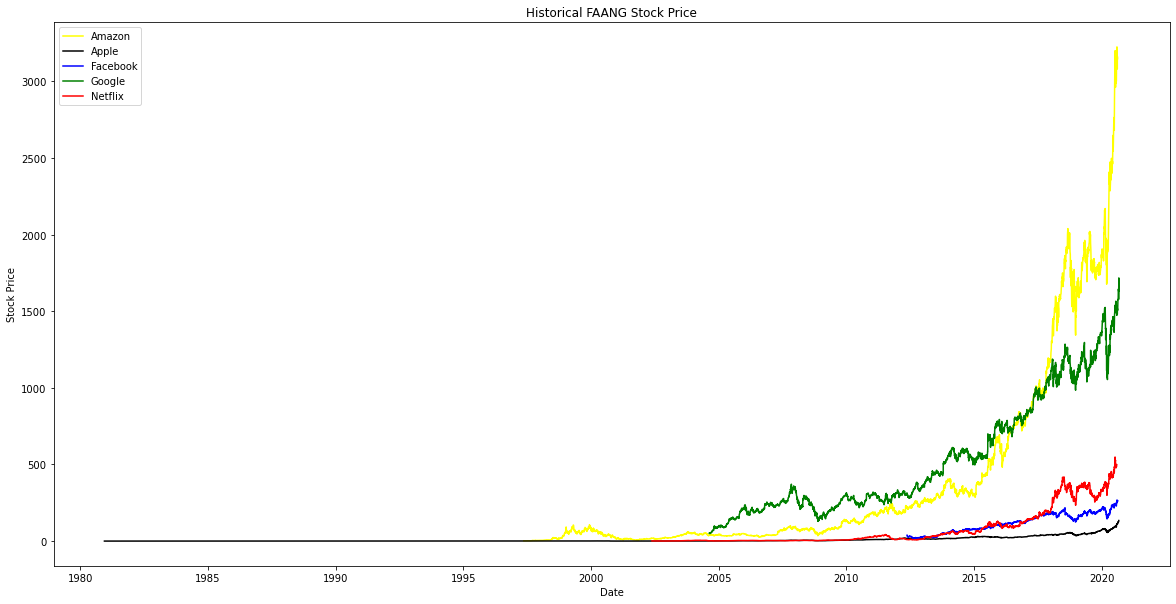

In [48]:
# Plot historical linechart of stock prices

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")
plt.title("Historical FAANG Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

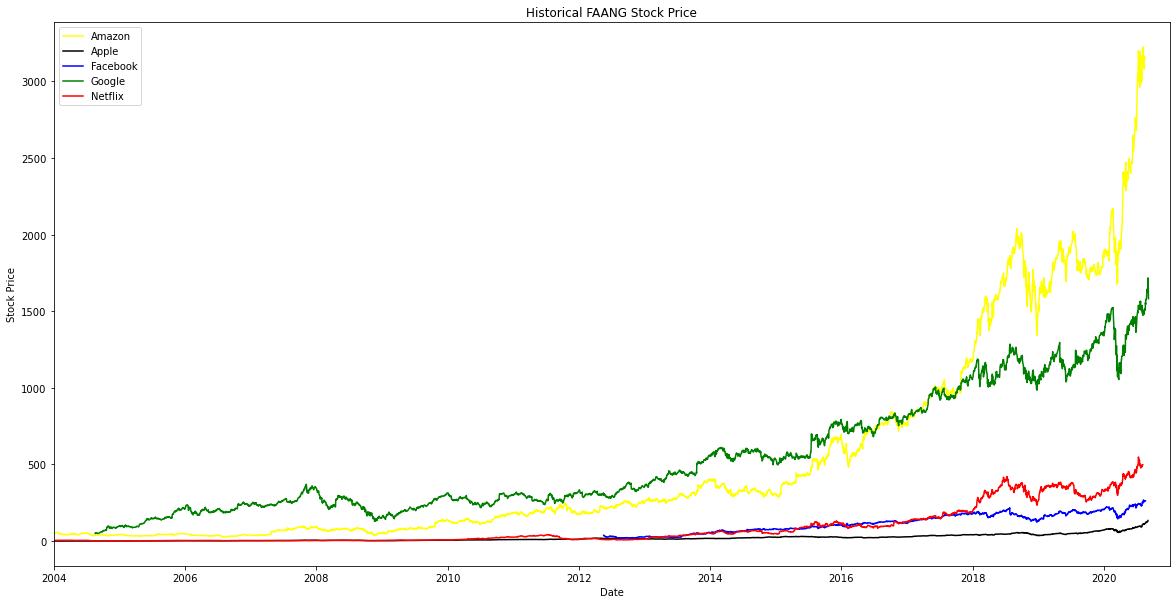

In [49]:
# Zoom-in to 2004+ to see all stocks better (most FAANG stocks went public in 2000s)

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")
plt.xlim(datetime(2004,1,1), datetime(2020,12,31))
plt.title("Historical FAANG Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

#### General Insights on Stock Prices:
1. Amazon and Google are most expensive stocks, with Amazon more expensive in recent years 2018+.
2. Apple seems like least expensive stock in all years.
3. Most FAANG stocks have stock data starting in 2000s (first went public).
4. All FAANG stocks seem to rise over the long run.

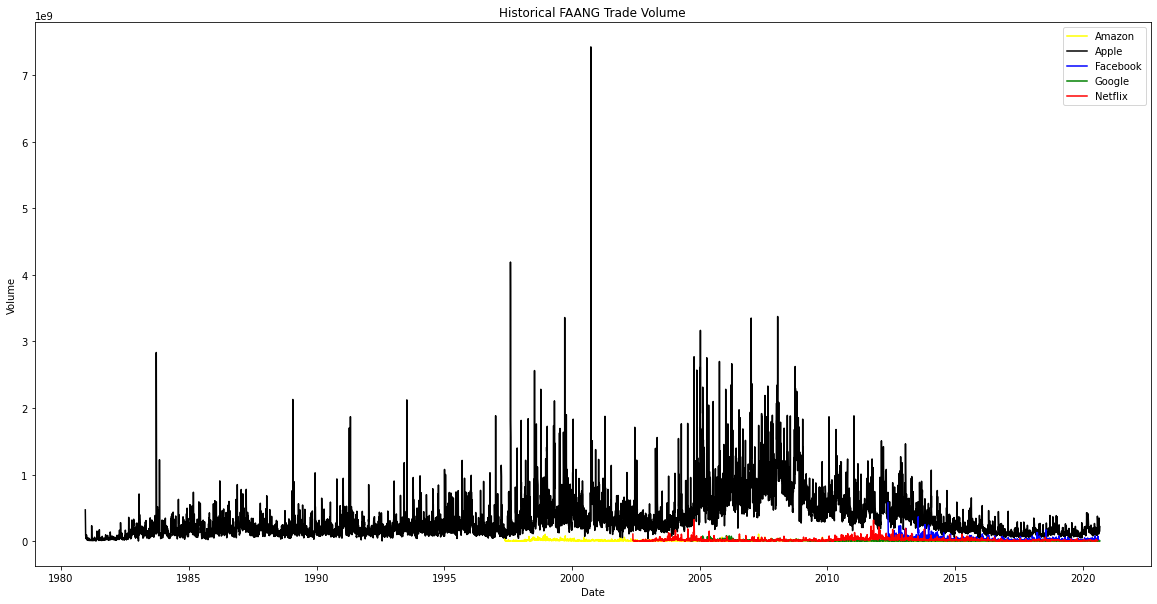

In [50]:
# Plot historical linechart of trade volume

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Vol, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Vol, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Vol, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Vol, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Vol, label="Netflix", color="red")
plt.title("Historical FAANG Trade Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

#### General Insights on Trading Volume:
1. Volume refers to the amount of shares or contracts traded in an asset or security over a period of time.
2. Apple stock (black) clearly has the most trade activity over the years by far.
3. Daily volume seems to be very volatile, which makes sense. You would expect the amount traded to vary a lot each day.
4. We will dig into this more in question #4 down below.

# 1) What are the FAANG stocks with most growth?

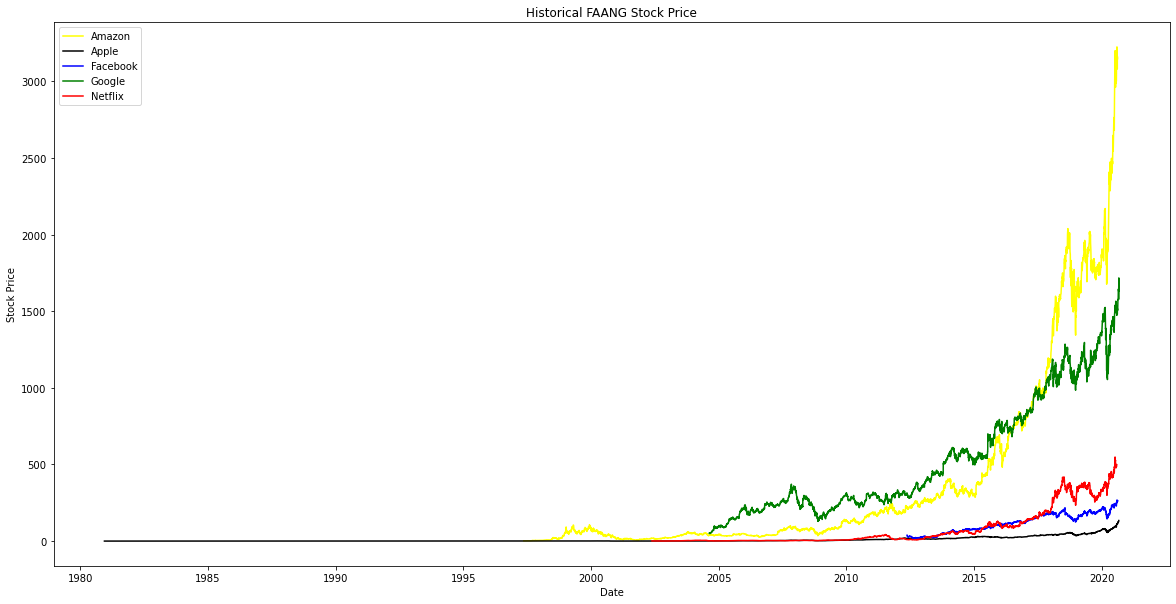

In [51]:
# Plot historical linechart of stock prices

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")
plt.title("Historical FAANG Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

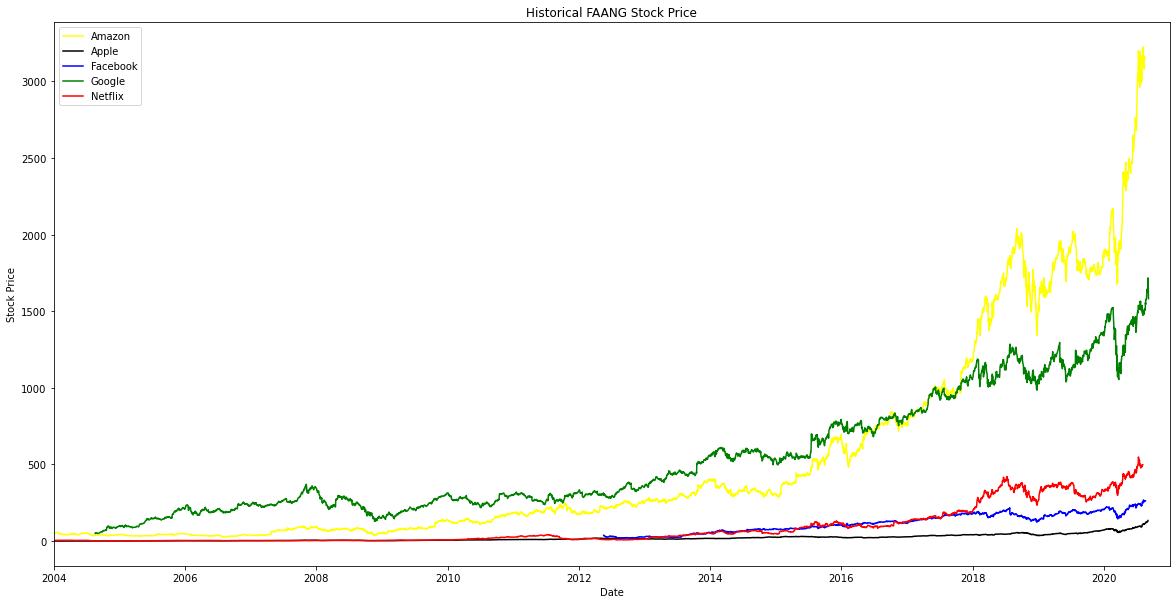

In [52]:
# Zoom-in to 2004+ to see all stocks better (most FAANG stocks went public in 2000s)

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")
plt.xlim(datetime(2004,1,1), datetime(2020,12,31))
plt.title("Historical FAANG Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

In [53]:
# Create annual dataframes for end of years (2014-2019) for stock return calculations
# Calculating stock return as ((End of Current Year Price / End of Prior Year Price) - 1) * 100

EOY2014 = merged2014_df[merged2014_df["Date"]==merged2014_df["Date"].max()].reset_index(drop=True)
EOY2015 = merged2015_df[merged2015_df["Date"]==merged2015_df["Date"].max()].reset_index(drop=True)
EOY2016 = merged2016_df[merged2016_df["Date"]==merged2016_df["Date"].max()].reset_index(drop=True)
EOY2017 = merged2017_df[merged2017_df["Date"]==merged2017_df["Date"].max()].reset_index(drop=True)
EOY2018 = merged2018_df[merged2018_df["Date"]==merged2018_df["Date"].max()].reset_index(drop=True)
EOY2019 = merged2019_df[merged2019_df["Date"]==merged2019_df["Date"].max()].reset_index(drop=True)

return_cols = ["Amazon_Adj_Close", "Apple_Adj_Close", "Facebook_Adj_Close", "Google_Adj_Close", 
               "Netflix_Adj_Close"]

returns2015 = (EOY2015[return_cols]/EOY2014[return_cols] - 1) * 100
returns2015["Date"] = pd.DatetimeIndex(EOY2015["Date"]).year.astype(str)

returns2016 = (EOY2016[return_cols]/EOY2015[return_cols] - 1) * 100
returns2016["Date"] = pd.DatetimeIndex(EOY2016["Date"]).year.astype(str)

returns2017 = (EOY2017[return_cols]/EOY2016[return_cols] - 1) * 100
returns2017["Date"] = pd.DatetimeIndex(EOY2017["Date"]).year.astype(str)

returns2018 = (EOY2018[return_cols]/EOY2017[return_cols] - 1) * 100
returns2018["Date"] = pd.DatetimeIndex(EOY2018["Date"]).year.astype(str)

returns2019 = (EOY2019[return_cols]/EOY2018[return_cols] - 1) * 100
returns2019["Date"] = pd.DatetimeIndex(EOY2019["Date"]).year.astype(str)

returns_df = pd.concat([returns2015,returns2016,returns2017,returns2018,returns2019],axis=0,ignore_index=True)

returns_df

,Amazon_Adj_Close,Apple_Adj_Close,Facebook_Adj_Close,Google_Adj_Close,Netflix_Adj_Close,Date
0,117.783148,-3.018268,34.145091,46.611766,134.385246,2015
1,10.945568,12.489762,9.927384,1.856017,8.235706,2016
2,55.956366,48.452858,53.376793,32.929522,55.056543,2017
3,28.431683,-5.370280,-25.711209,-0.801215,39.435299,2018
4,23.027757,88.934957,56.571821,28.176198,20.888441,2019


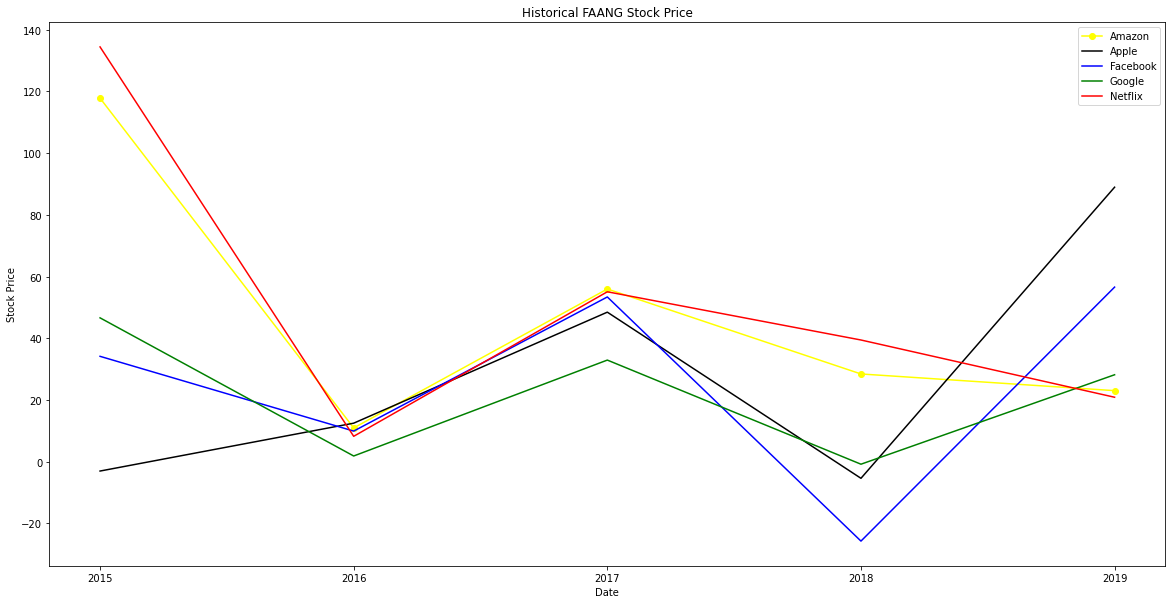

In [54]:
# Plot linechart of annual stock returns over 5 years 2015-2019

plt.figure(figsize=(20,10))

plt.plot(returns_df.Date, returns_df.Amazon_Adj_Close, marker="o", label="Amazon", color="yellow")
plt.plot(returns_df.Date, returns_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(returns_df.Date, returns_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(returns_df.Date, returns_df.Google_Adj_Close, label="Google", color="green")
plt.plot(returns_df.Date, returns_df.Netflix_Adj_Close, label="Netflix", color="red")
plt.title("Historical FAANG Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

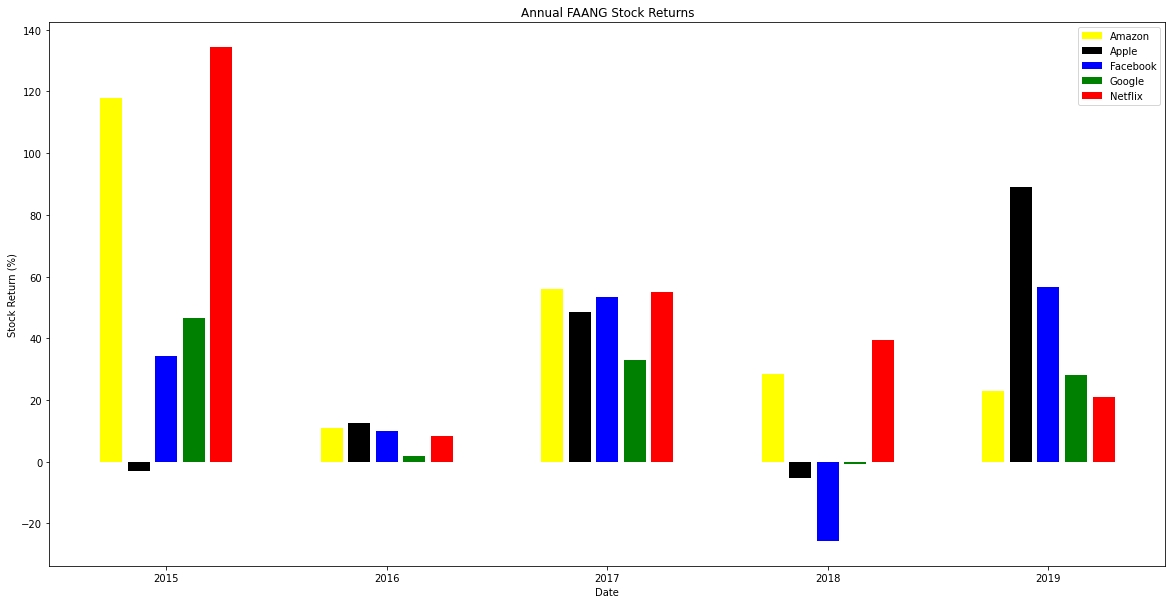

In [55]:
# Create multi barchart to compare annual returns for each stock (above linechart not easy to compare)

plt.figure(figsize=(20,10))

x_axis = np.arange(len(returns_df.Date))

plt.bar(x_axis -0.25, returns_df.Amazon_Adj_Close, width=0.1, label = 'Amazon', color="yellow")
plt.bar(x_axis -0.125, returns_df.Apple_Adj_Close, width=0.1, label = 'Apple', color="black")
plt.bar(x_axis +0, returns_df.Facebook_Adj_Close, width=0.1, label = 'Facebook', color="blue")
plt.bar(x_axis +0.125, returns_df.Google_Adj_Close, width=0.1, label = 'Google', color="green")
plt.bar(x_axis +0.25, returns_df.Netflix_Adj_Close, width=0.1, label = 'Netflix', color="red")

plt.xticks(x_axis,returns_df.Date)
plt.title("Annual FAANG Stock Returns")
plt.xlabel("Date")
plt.ylabel("Stock Return (%)")
plt.legend()

In [56]:
# Calc average annual return over 2015-2019 for each stock

return_cols = ["Amazon_Adj_Close", "Apple_Adj_Close", "Facebook_Adj_Close", "Google_Adj_Close", 
               "Netflix_Adj_Close"]

print("5-Yr Average Annual Return (%) Over 2015-2019:\n")
print(round(returns_df[return_cols].mean(),1).sort_values(ascending=False))

5-Yr Average Annual Return (%) Over 2015-2019:

Netflix_Adj_Close     51.6
Amazon_Adj_Close      47.2
Apple_Adj_Close       28.3
Facebook_Adj_Close    25.7
Google_Adj_Close      21.8
dtype: float64


#### Insights for Question 1: 
1. We focused on 5 recent years of returns (2015-2019).
2. Amazon (yellow) and Netflix (red) seem to have the best returns over 2015-2019 (and best 5-yr average).
3. Amazon (yellow) and Netflix (red) had incredible returns in 2015 (over 100%)!
4. Google(green) seems to have the worst returns over 2015-2019 (and worst 5-yr average).
4. Facebook(blue) had a bad year in 2018 (worse than a -20% return).

# 2) What are the FAANG stocks with most volatility?

In [57]:
# Create variable of columns we want standard deviation on (adjusted close stock prices)
std_cols = ["Amazon_Adj_Close", "Apple_Adj_Close", "Facebook_Adj_Close", "Google_Adj_Close", "Netflix_Adj_Close"]

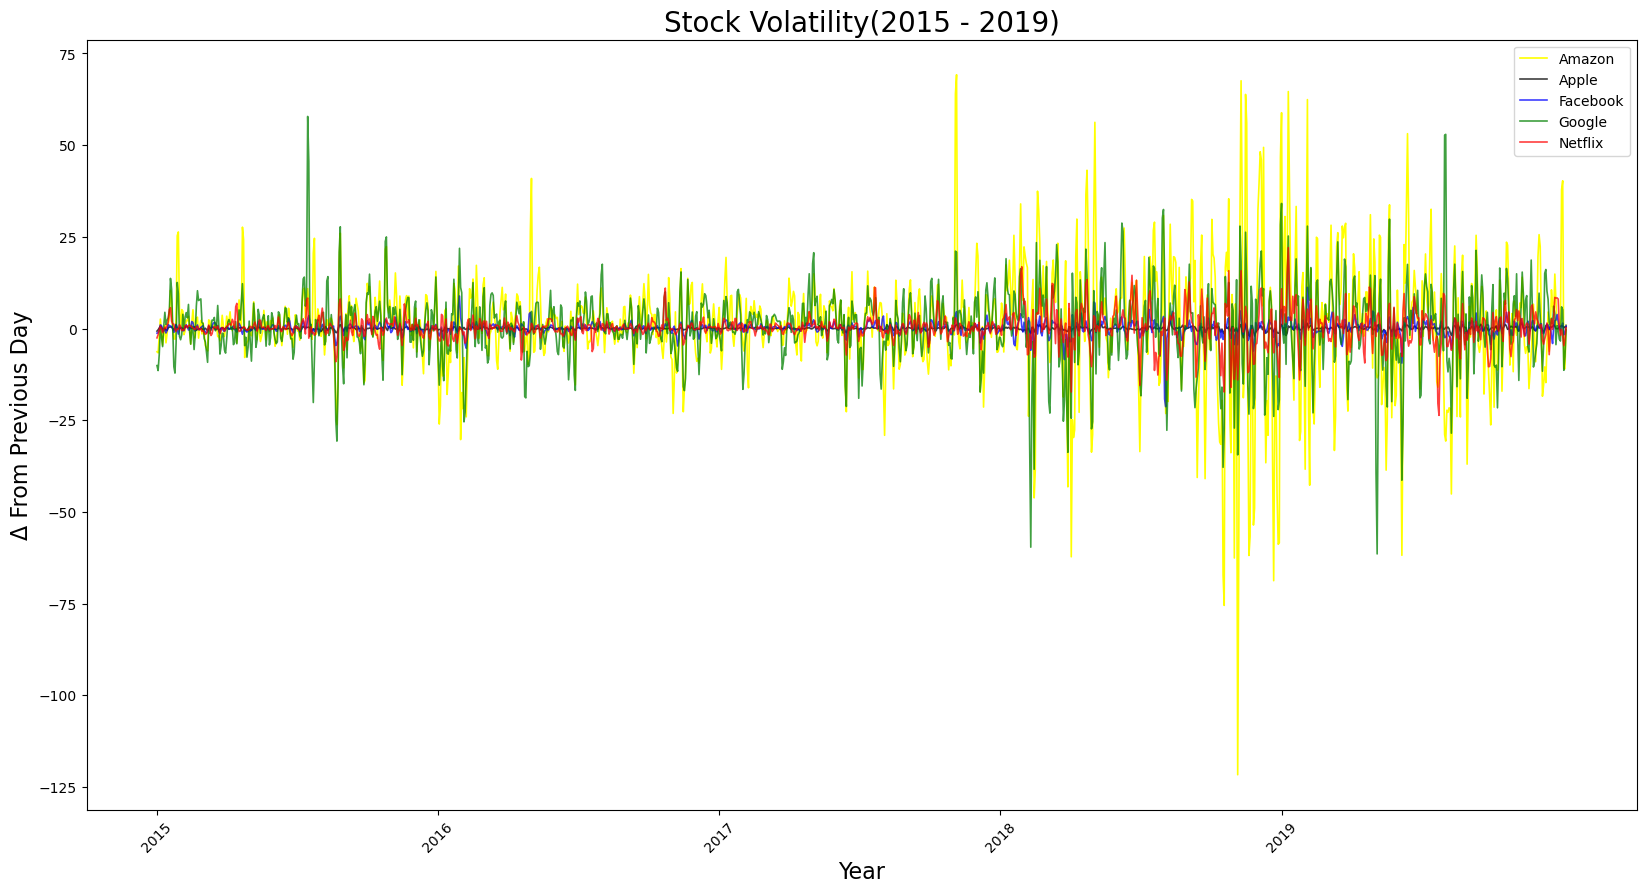

In [5]:
#Stock derivatives (Volatility)
fig, ax1 = plt.subplots(figsize=(20,10))

ax1.plot(np.gradient(merged_df[(merged_df['Date'] >= '2015-1-1') & (merged_df['Date'] < '2020-1-1')]['Amazon_Adj_Close']), 
         label = 'Amazon', color="yellow", alpha=1, linewidth=1.2)

ax1.plot(np.gradient(merged_df[(merged_df['Date'] >= '2015-1-1') & (merged_df['Date'] < '2020-1-1')]['Apple_Adj_Close']), 
         label="Apple", color="black", alpha=0.75, linewidth=1.2)

ax1.plot(np.gradient(merged_df[(merged_df['Date'] >= '2015-1-1') & (merged_df['Date'] < '2020-1-1')]['Facebook_Adj_Close']), 
         label="Facebook", color="blue", alpha=0.75, linewidth=1.2)

ax1.plot(np.gradient(merged_df[(merged_df['Date'] >= '2015-1-1') & (merged_df['Date'] < '2020-1-1')]['Google_Adj_Close']), 
         label="Google", color="green", alpha=0.75, linewidth=1.2)

ax1.plot(np.gradient(merged_df[(merged_df['Date'] >= '2015-1-1') & (merged_df['Date'] < '2020-1-1')]['Netflix_Adj_Close']), 
         label="Netflix", color="red", alpha=0.75, linewidth=1.2)

plt.title("Stock Volatility(2015 - 2019)", fontsize=20)

#Set custom xticks and labels for the selected years
ax1.set_xticks([0, 250, 500, 750, 1000])
ax1.set_xticklabels(['2015', '2016', '2017', '2018', '2019'], rotation=45)

# Set the labels for the x- and y-axes
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Δ From Previous Day', fontsize=16)

#plt.xlim(datetime(2020,1,1), datetime(2020,7,31))
ax1.legend()

In [58]:
# Calc std deviation of daily stock prices over 2015
merged2015_std = merged2015_df[std_cols].std().sort_values(ascending=False)
round(merged2015_std,1)

Amazon_Adj_Close      110.7
Google_Adj_Close       87.2
Netflix_Adj_Close      22.9
Facebook_Adj_Close     10.2
Apple_Adj_Close         1.7
dtype: float64

In [59]:
# Calc std deviation of daily stock prices over 2016
merged2016_std = merged2016_df[std_cols].std().sort_values(ascending=False)
round(merged2016_std,1)

Amazon_Adj_Close      92.4
Google_Adj_Close      37.4
Netflix_Adj_Close     11.8
Facebook_Adj_Close     8.9
Apple_Adj_Close        1.9
dtype: float64

In [60]:
# Calc std deviation of daily stock prices over 2017
merged2017_std = merged2017_df[std_cols].std().sort_values(ascending=False)
round(merged2017_std,1)

Amazon_Adj_Close      106.6
Google_Adj_Close       75.4
Netflix_Adj_Close      21.3
Facebook_Adj_Close     17.4
Apple_Adj_Close         3.7
dtype: float64

In [61]:
# Calc std deviation of daily stock prices over 2018
merged2018_std = merged2018_df[std_cols].std().sort_values(ascending=False)
round(merged2018_std,1)

Amazon_Adj_Close      197.6
Google_Adj_Close       69.7
Netflix_Adj_Close      49.1
Facebook_Adj_Close     19.9
Apple_Adj_Close         5.1
dtype: float64

In [62]:
# Calc std deviation of daily stock prices over 2019
merged2019_std = merged2019_df[std_cols].std().sort_values(ascending=False)
round(merged2019_std,1)

Amazon_Adj_Close      101.7
Google_Adj_Close       79.8
Netflix_Adj_Close      34.4
Facebook_Adj_Close     16.1
Apple_Adj_Close         8.7
dtype: float64

In [63]:
# Create annual dataframe for end of years (2015-2019) for std deviations
std2015_2019 = pd.concat([merged2015_std, merged2016_std, merged2017_std, merged2018_std,
                          merged2019_std],axis=1,ignore_index=True)

std2015_2019.columns = ["2015","2016","2017","2018","2019"]

std2015_2019

,2015,2016,2017,2018,2019
Amazon_Adj_Close,110.745009,92.362312,106.580210,197.561309,101.658287
Google_Adj_Close,87.191516,37.402048,75.367335,69.684458,79.803849
Netflix_Adj_Close,22.941390,11.770876,21.295641,49.053404,34.447251
Facebook_Adj_Close,10.211442,8.899858,17.379058,19.946072,16.107919
Apple_Adj_Close,1.714331,1.905167,3.656703,5.098073,8.717815


In [64]:
# Transpose dataframe for consistent format and easier plotting (dates axis=0)

std2015_2019 = std2015_2019.T
std2015_2019

,Amazon_Adj_Close,Google_Adj_Close,Netflix_Adj_Close,Facebook_Adj_Close,Apple_Adj_Close
2015,110.745009,87.191516,22.941390,10.211442,1.714331
2016,92.362312,37.402048,11.770876,8.899858,1.905167
2017,106.580210,75.367335,21.295641,17.379058,3.656703
2018,197.561309,69.684458,49.053404,19.946072,5.098073
2019,101.658287,79.803849,34.447251,16.107919,8.717815


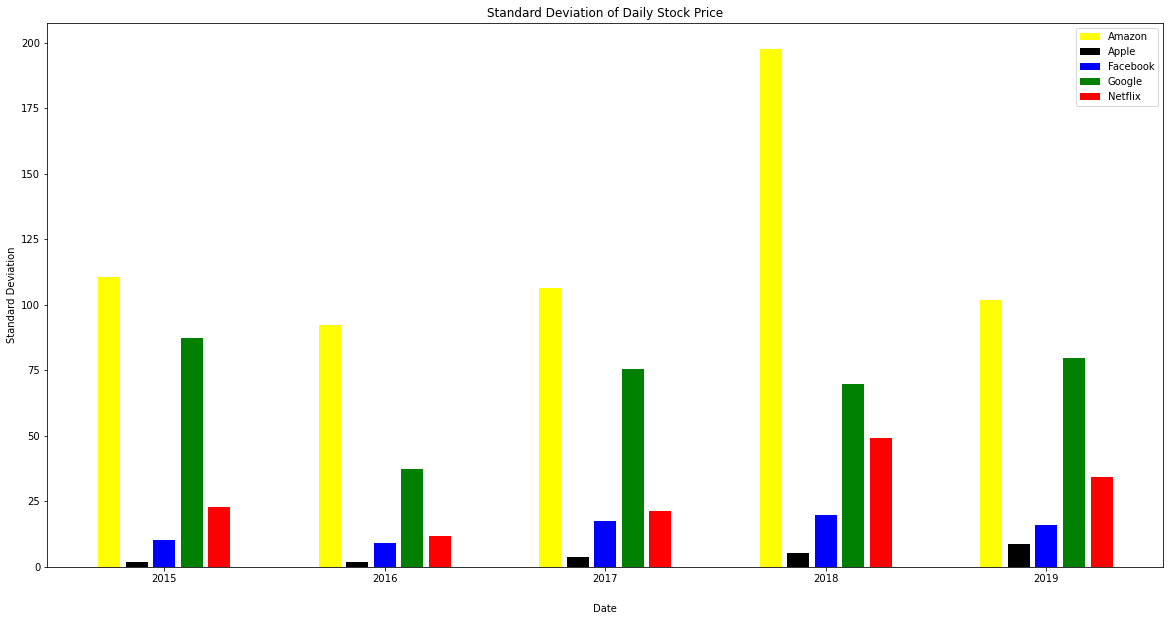

In [65]:
# Create multi barchart to compare standard deviation for each stock over different years

plt.figure(figsize=(20,10))

x_axis = np.arange(len(std2015_2019.index))

plt.bar(x_axis -0.25, std2015_2019.Amazon_Adj_Close, width=0.1, label = 'Amazon', color="yellow")
plt.bar(x_axis -0.125, std2015_2019.Apple_Adj_Close, width=0.1, label = 'Apple', color="black")
plt.bar(x_axis +0, std2015_2019.Facebook_Adj_Close, width=0.1, label = 'Facebook', color="blue")
plt.bar(x_axis +0.125, std2015_2019.Google_Adj_Close, width=0.1, label = 'Google', color="green")
plt.bar(x_axis +0.25, std2015_2019.Netflix_Adj_Close, width=0.1, label = 'Netflix', color="red")

plt.xticks(x_axis, std2015_2019.index)
plt.title("Standard Deviation of Daily Stock Price")
plt.xlabel("Date", labelpad=20)
plt.ylabel("Standard Deviation")
plt.legend()

In [66]:
# Calc std deviation of daily stock prices across all days available in data
merged_std = merged_df[std_cols].std().sort_values(ascending=False)

print("Std Deviation of Daily Prices Across All Days in Data:\n")
print(round(merged_std,1))

Std Deviation of Daily Prices Across All Days in Data:

Amazon_Adj_Close      595.4
Google_Adj_Close      383.0
Netflix_Adj_Close     118.3
Facebook_Adj_Close     61.6
Apple_Adj_Close        16.4
dtype: float64


In [67]:
# Calc std deviation of annual stock returns over 2015-2019 to see how it varies from above
return_cols = ["Amazon_Adj_Close", "Apple_Adj_Close", "Facebook_Adj_Close", "Google_Adj_Close", 
               "Netflix_Adj_Close"]

print("Standard Deviation of Annual Stock Returns (2015-2019):\n")
print(round(returns_df[return_cols].std(),1).sort_values(ascending=False))

Standard Deviation of Annual Stock Returns (2015-2019):

Netflix_Adj_Close     49.6
Amazon_Adj_Close      42.7
Apple_Adj_Close       40.1
Facebook_Adj_Close    34.2
Google_Adj_Close      20.5
dtype: float64


#### Insights for Question 2: 
1. We focused on 5 recent years of returns (2015-2019).
2. Amazon (yellow) clearly has the highest daily standard deviation in stock price (for every year over 2015-2019 and lifetime).
3. Google (green) is a close second.
4. Apple (black) clearly has the lower daily standard deviation in stock price (for every year over 2015-2019 and lifetime).

# 3) What are the FAANG stocks with most activity?

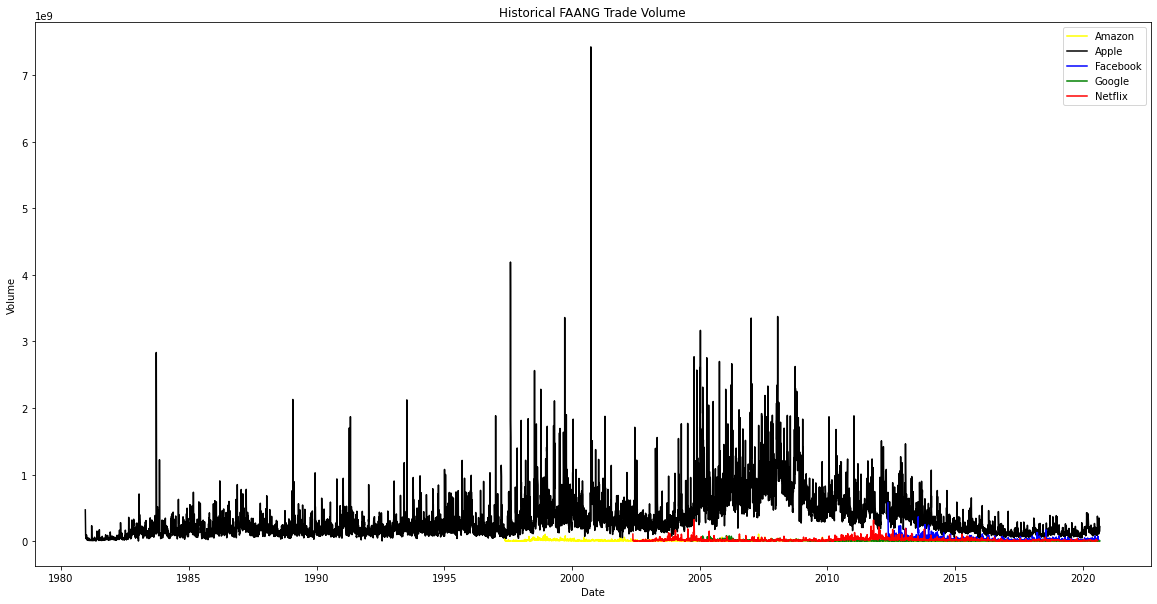

In [68]:
# Plot historical linechart of trade volume

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Vol, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Vol, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Vol, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Vol, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Vol, label="Netflix", color="red")
plt.title("Historical FAANG Trade Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

#### Notes:
1. Volume refers to the amount of shares or contracts traded in an asset or security over a period of time.
2. Apple clearly has most historical trade activity.
3. Apple is also the cheapest in terms of stock price. Is this related to the trade activity; cheaper so more trades? Can we compare volume and stock price?

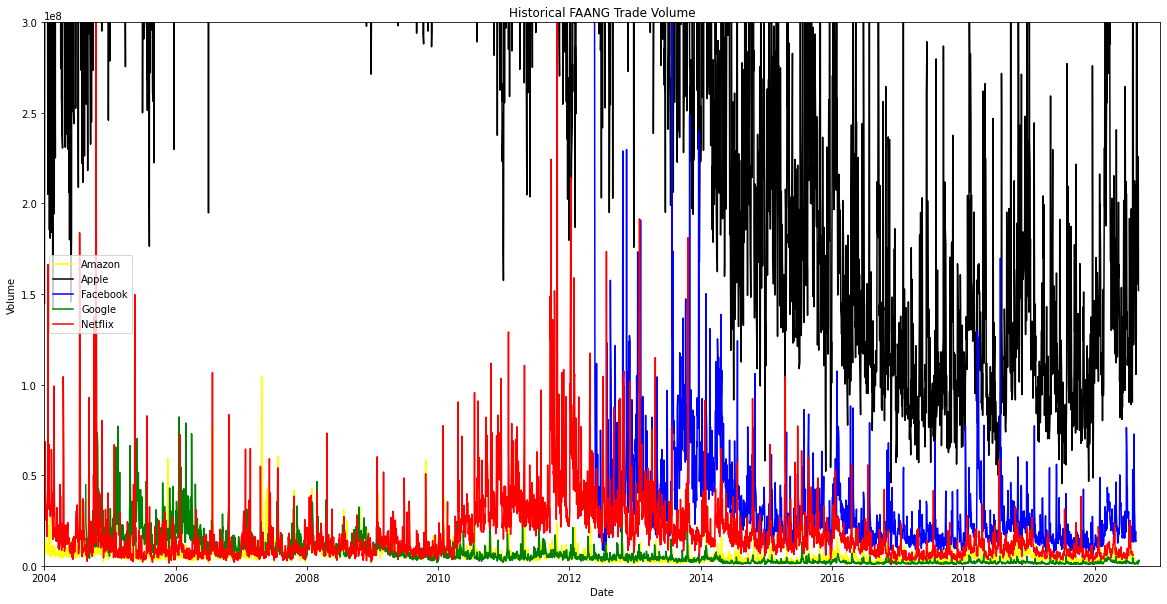

In [69]:
# Zoom-in to 2004+ to see all stocks better (most FAANG stocks went public in 2000s)

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Vol, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Vol, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Vol, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Vol, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Vol, label="Netflix", color="red")
plt.xlim(datetime(2004,1,1), datetime(2020,12,31))
plt.ylim(0, 300000000)
plt.title("Historical FAANG Trade Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()

#### Notes:
1. Although there are some exceptions, in general, it seems that trade activity comes from Apple, Facebook and Netflix (with Apple being the most actively traded by far). In terms of stock price, these 3 are also the 3 cheapest FAANG stocks.
2. With a ton of trade volume and Apple's stock price not skyrocketting, it would imply that there is a fair mix of buyers/sellers (buying activity would increase price and selling activity would decrease price).

In [70]:
# Create variable of columns we want mean on (trade volume)
mean_cols = ["Amazon_Vol", "Apple_Vol", "Facebook_Vol", "Google_Vol", "Netflix_Vol"]

In [71]:
# Mean over 2015
merged2015_df[mean_cols].mean().sort_values(ascending=False).astype(int)

Apple_Vol       207397617
Facebook_Vol     26958879
Netflix_Vol      18575888
Amazon_Vol        3798023
Google_Vol        2169818
dtype: int64

In [72]:
# Mean over 2016
merged2016_df[mean_cols].mean().sort_values(ascending=False).astype(int)

Apple_Vol       153690123
Facebook_Vol     25475071
Netflix_Vol      12836284
Amazon_Vol        4122048
Google_Vol        1969063
dtype: int64

In [73]:
# Mean over 2017
merged2017_df[mean_cols].mean().sort_values(ascending=False).astype(int)

Apple_Vol       108538270
Facebook_Vol     16789952
Netflix_Vol       6590004
Amazon_Vol        3516754
Google_Vol        1617135
dtype: int64

In [74]:
# Mean over 2018
merged2018_df[mean_cols].mean().sort_values(ascending=False).astype(int)

Apple_Vol       135875289
Facebook_Vol     27709717
Netflix_Vol      11468174
Amazon_Vol        5637342
Google_Vol        2046296
dtype: int64

In [75]:
# Mean over 2019
merged2019_df[mean_cols].mean().sort_values(ascending=False).astype(int)

Apple_Vol       112306776
Facebook_Vol     16275265
Netflix_Vol       7882836
Amazon_Vol        3883492
Google_Vol        1519040
dtype: int64

In [76]:
# Calc mean of daily trade volume across all days available in data
print("Mean daily trade volume across all days in data:\n")
print(merged_df[mean_cols].mean().sort_values(ascending=False).astype(int))

Mean daily trade volume across all days in data:

Apple_Vol       341405053
Facebook_Vol     32690182
Netflix_Vol      17613393
Amazon_Vol        7514724
Google_Vol        6915277
dtype: int64


In [77]:
# Look at correlation matrix to confirm Volume is negatively correlated with Stock Price (Adjusted Close)
merged_df.corr()

,Amazon_Adj_Close,Amazon_Vol,Apple_Adj_Close,Apple_Vol,Facebook_Adj_Close,Facebook_Vol,Google_Adj_Close,Google_Vol,Netflix_Adj_Close,Netflix_Vol,Int_Rate
Amazon_Adj_Close,1.000000,-0.232993,0.961309,-0.389628,0.912517,-0.345149,0.955805,-0.440866,0.989557,-0.180294,-0.276607
Amazon_Vol,-0.232993,1.000000,-0.291853,0.199055,0.167937,0.140199,-0.266506,0.306937,-0.220143,0.039042,0.318969
Apple_Adj_Close,0.961309,-0.291853,1.000000,-0.149192,0.875269,-0.347162,0.949931,-0.503814,0.937274,-0.125921,-0.446831
Apple_Vol,-0.389628,0.199055,-0.149192,1.000000,-0.660877,0.462353,-0.615704,0.570891,-0.472154,0.060617,-0.228140
Facebook_Adj_Close,0.912517,0.167937,0.875269,-0.660877,1.000000,-0.451432,0.974086,-0.504890,0.909486,-0.527595,0.680123
Facebook_Vol,-0.345149,0.140199,-0.347162,0.462353,-0.451432,1.000000,-0.412277,0.447428,-0.353683,0.311605,-0.323982
Google_Adj_Close,0.955805,-0.266506,0.949931,-0.615704,0.974086,-0.412277,1.000000,-0.537307,0.946383,-0.218949,-0.187562
Google_Vol,-0.440866,0.306937,-0.503814,0.570891,-0.504890,0.447428,-0.537307,1.000000,-0.425805,-0.041454,0.471481
Netflix_Adj_Close,0.989557,-0.220143,0.937274,-0.472154,0.909486,-0.353683,0.946383,-0.425805,1.000000,-0.193230,-0.073373
Netflix_Vol,-0.180294,0.039042,-0.125921,0.060617,-0.527595,0.311605,-0.218949,-0.041454,-0.193230,1.000000,-0.264584


#### Insights for Question 3: 
1. Volume refers to the amount of shares or contracts traded in an asset or security over a period of time.
2. Apple shows to be the most actively traded FAANG stock by far. Next is Facebook and Netflix.
3. Google and Amazon are the least traded FAANG stocks.
4. Looking back at stock price chart from earlier, we see that the cheapest FAANG stocks are traded the most by people, while the expensive FAANG stocks are traded the least.
5. We noticed that although Apple has a huge amount of trade activity compared to other FAANG stocks, the stock price does not shoot up like one might expect if everyone was buying the stock. This implies that there is likely a fair amount of both buyers/sellers of the stock.

# 4) How do FAANG stocks perform during recession periods?

#### US recession periods are:
1. The Gulf War Recession: July 1990–March 1991
2. The Dot-Bomb Recession: March 2001–November 2001
3. The Great Recession: December 2007–June 2009
4. The COVID-19 Recession: February 2020–April 2020

Reference: https://www.investopedia.com/articles/economics/08/past-recessions.asp

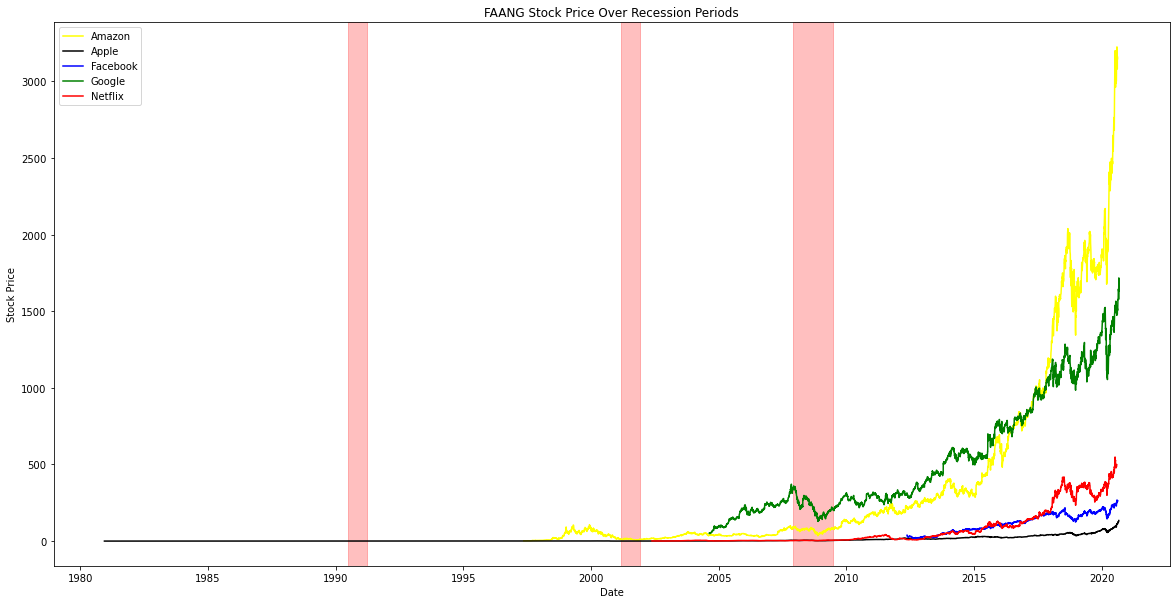

In [78]:
# Plot stock price with recession periods highlighted

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")

# Add bounds for The Gulf Ware Recession period
plt.axvspan(datetime(1990,7,1), datetime(1991,3,31), color='red', alpha=0.25)

# Add bounds for The Dot-Bomb Recession period
plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), color='red', alpha=0.25)

# Add bounds for The Great Recession period
plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), color='red', alpha=0.25)

plt.title("FAANG Stock Price Over Recession Periods")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

## The Great Recession: December 2007–June 2009

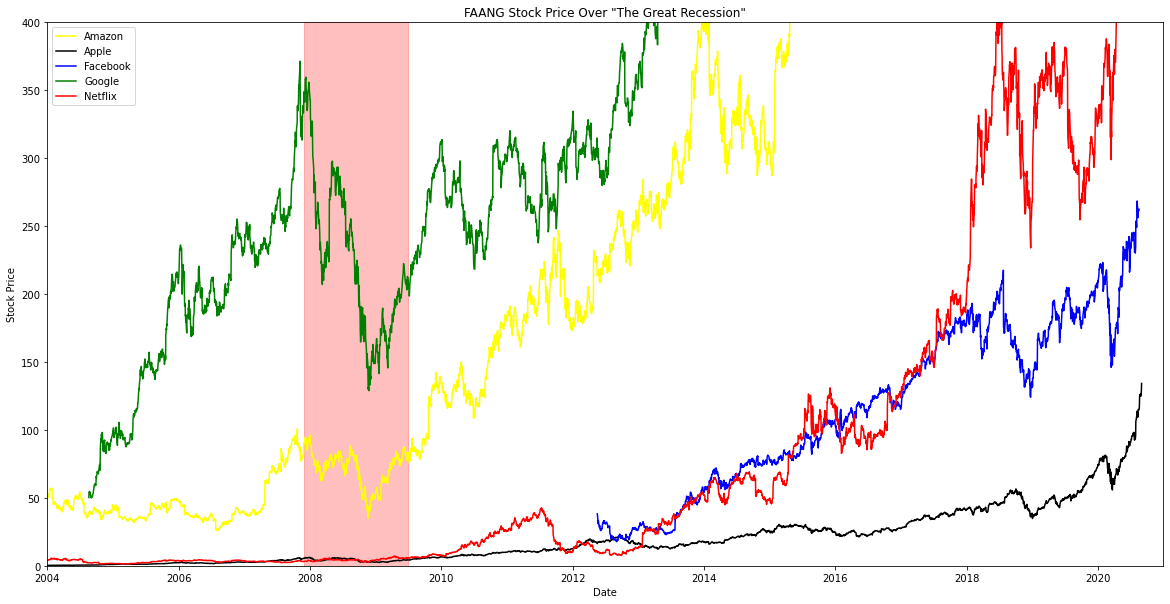

In [79]:
# Zoom-in to The Great Recession period

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")

plt.xlim(datetime(2004,1,1), datetime(2020,12,31))
plt.ylim(0, 400)

# Add bounds for The Gulf Ware Recession period
plt.axvspan(datetime(1990,7,1), datetime(1991,3,31), color='red', alpha=0.25)

# Add bounds for The Dot-Bomb Recession period
plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), color='red', alpha=0.25)

# Add bounds for The Great Recession period
plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), color='red', alpha=0.25)

plt.title('FAANG Stock Price Over "The Great Recession"')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

In [80]:
# Find bottom price and date for FAANG stocks over Great Recession
# Facebook was not public over this period

# Find bottom price and date for Amazon over Great Recession
amazon_bottomprice_gr = merged_df["Amazon_Adj_Close"][
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].min()

amazon_bottomdate_gr = merged_df["Date"][(merged_df["Amazon_Adj_Close"] == amazon_bottomprice_gr) &
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].values
amazon_bottomdate_gr = amazon_bottomdate_gr[0]

# Find bottom price and date for Apple over Great Recession
apple_bottomprice_gr = merged_df["Apple_Adj_Close"][
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].min()

apple_bottomdate_gr = merged_df["Date"][(merged_df["Apple_Adj_Close"] == apple_bottomprice_gr) &
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].values
apple_bottomdate_gr = apple_bottomdate_gr[0]

# Find bottom price and date for Google over Great Recession
google_bottomprice_gr = merged_df["Google_Adj_Close"][
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].min()
google_bottomdate_gr = merged_df["Date"][(merged_df["Google_Adj_Close"] == google_bottomprice_gr) &
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].values
google_bottomdate_gr = google_bottomdate_gr[0]

# Find bottom price and date for Netflix over Great Recession
netflix_bottomprice_gr = merged_df["Netflix_Adj_Close"][
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].min()
netflix_bottomdate_gr = merged_df["Date"][(merged_df["Netflix_Adj_Close"] == netflix_bottomprice_gr) &
    (merged_df.Date >= datetime(2007,11,30)) & (merged_df.Date <= datetime(2009,6,30))].values
netflix_bottomdate_gr = netflix_bottomdate_gr[0]

print("Amazon bottom: ", amazon_bottomprice_gr, amazon_bottomdate_gr)
print("Apple bottom: ", apple_bottomprice_gr, apple_bottomdate_gr)
print("Google bottom: ", google_bottomprice_gr, google_bottomdate_gr)
print("Netflix bottom: ", netflix_bottomprice_gr, netflix_bottomdate_gr)

Amazon bottom:  35.03 2008-11-20T00:00:00.000000000
Apple bottom:  2.41 2009-01-20T00:00:00.000000000
Google bottom:  128.85 2008-11-24T00:00:00.000000000
Netflix bottom:  2.56 2008-10-27T00:00:00.000000000


In [81]:
# Find dates where FAANG stocks recovered from bottom to pre-recession price
# Facebook was not public over this period

# Find date where Amazon recovered to pre-recession price
amazon_preprice_gr =  merged_df["Amazon_Adj_Close"][merged_df.Date == datetime(2007,11,30)].values
amazon_preprice_gr = amazon_preprice_gr[0]

amazon_recoverdate_gr = merged_df["Date"][
    (merged_df["Amazon_Adj_Close"] >= amazon_preprice_gr) & (merged_df["Date"] > amazon_bottomdate_gr)].min()

# Find date where Apple recovered to pre-recession price
apple_preprice_gr =  merged_df["Apple_Adj_Close"][merged_df.Date == datetime(2007,11,30)].values
apple_preprice_gr = apple_preprice_gr[0]

apple_recoverdate_gr = merged_df["Date"][
    (merged_df["Apple_Adj_Close"] >= apple_preprice_gr) & (merged_df["Date"] > apple_bottomdate_gr)].min()

# Find date where Google recovered to pre-recession price
google_preprice_gr =  merged_df["Google_Adj_Close"][merged_df.Date == datetime(2007,11,30)].values
google_preprice_gr = google_preprice_gr[0]

google_recoverdate_gr = merged_df["Date"][
    (merged_df["Google_Adj_Close"] >= google_preprice_gr) & (merged_df["Date"] > google_bottomdate_gr)].min()

# Find date where Netflix recovered to pre-recession price
netflix_preprice_gr =  merged_df["Netflix_Adj_Close"][merged_df.Date == datetime(2007,11,30)].values
netflix_preprice_gr = netflix_preprice_gr[0]

netflix_recoverdate_gr = merged_df["Date"][
    (merged_df["Netflix_Adj_Close"] >= netflix_preprice_gr) & (merged_df["Date"] > netflix_bottomdate_gr)].min()

print("Amazon recover date: ", amazon_recoverdate_gr)
print("Apple recover date: ", apple_recoverdate_gr)
print("Google recover date: ", google_recoverdate_gr)
print("Netflix recover date: ", netflix_recoverdate_gr)

Amazon recover date:  2009-07-23 00:00:00
Apple recover date:  2009-09-17 00:00:00
Google recover date:  2012-09-06 00:00:00
Netflix recover date:  2008-10-31 00:00:00


In [82]:
# Calc time from stock bottom to recovery for FAANG stocks
# Facebook was not public over this period

amazon_recovertime_gr = amazon_recoverdate_gr - amazon_bottomdate_gr
apple_recovertime_gr = apple_recoverdate_gr - apple_bottomdate_gr
google_recovertime_gr = google_recoverdate_gr - google_bottomdate_gr
netflix_recovertime_gr = netflix_recoverdate_gr - netflix_bottomdate_gr

print("Amazon recover time: ", amazon_recovertime_gr)
print("Apple recover time: ", apple_recovertime_gr)
print("Google recover time: ", google_recovertime_gr)
print("Netflix recover time: ", netflix_recovertime_gr)

Amazon recover time:  245 days 00:00:00
Apple recover time:  240 days 00:00:00
Google recover time:  1382 days 00:00:00
Netflix recover time:  4 days 00:00:00


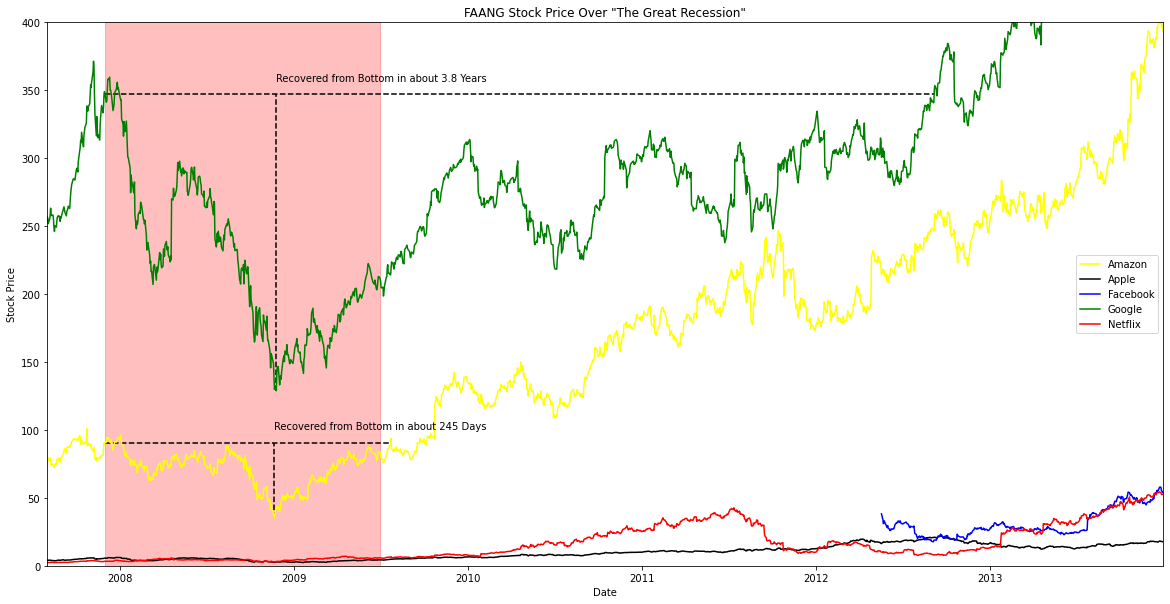

In [83]:
# Zoom-in plot closer on The Great Recession period and add recovery lines for Google and Amazon

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
plt.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")

plt.xlim(datetime(2007,8,1), datetime(2013,12,31))
plt.ylim(0, 400)

# Add bounds for The Gulf Ware Recession period
plt.axvspan(datetime(1990,7,1), datetime(1991,3,31), color='red', alpha=0.25)

# Add bounds for The Dot-Bomb Recession period
plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), color='red', alpha=0.25)

# Add bounds for The Great Recession period
plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), color='red', alpha=0.25)

# Add horizontal line for Google pre-recession price to recovery date
plt.hlines(merged_df["Google_Adj_Close"][merged_df.Date == datetime(2007,11,30)], xmin=datetime(2007,11,30), 
           xmax=google_recoverdate_gr, colors='black', linestyle="dashed")

# Add vertical line for Google bottom
plt.vlines(google_bottomdate_gr, google_bottomprice_gr, google_preprice_gr, colors='black', linestyle="dashed")

# Add horizontal line for Amazon pre-recession price to recovery date
plt.hlines(merged_df["Amazon_Adj_Close"][merged_df.Date == datetime(2007,11,30)], xmin=datetime(2007,11,30), 
           xmax=amazon_recoverdate_gr, colors='black', linestyle="dashed")

# Add vertical line for Amazon bottom
plt.vlines(amazon_bottomdate_gr, amazon_bottomprice_gr, amazon_preprice_gr, colors='black', linestyle="dashed")

# Add text on how long recovery time took
plt.annotate("Recovered from Bottom in about 3.8 Years", xy = (google_bottomdate_gr, google_preprice_gr + 10))
plt.annotate("Recovered from Bottom in about 245 Days", xy = (amazon_bottomdate_gr, amazon_preprice_gr + 10))

plt.title('FAANG Stock Price Over "The Great Recession"')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

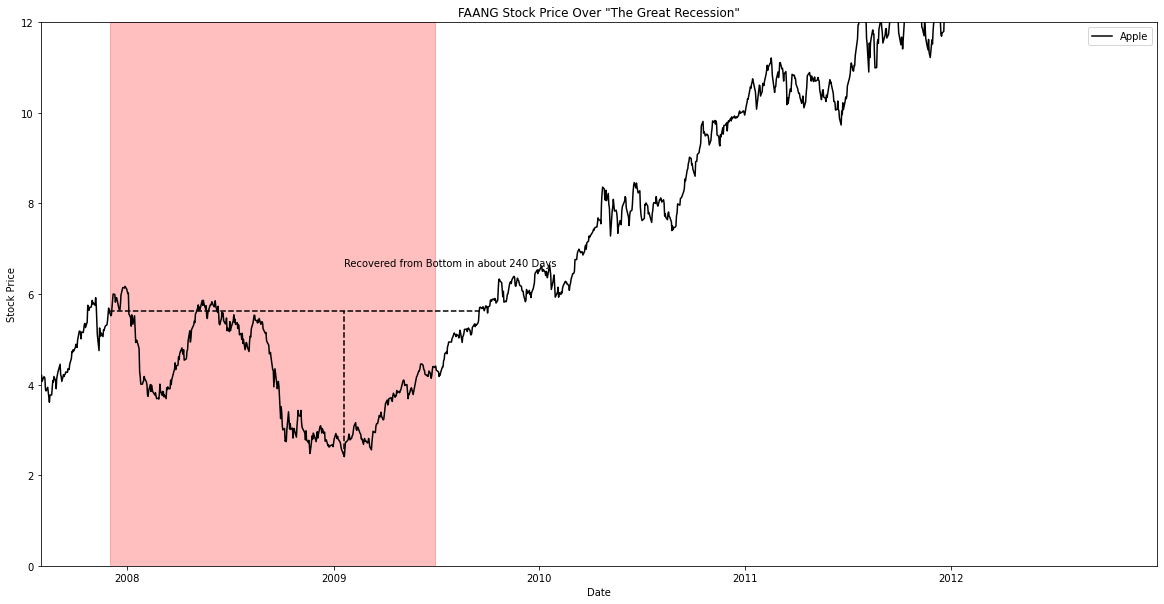

In [84]:
# Zoom-in just to Apple

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.xlim(datetime(2007,8,1), datetime(2012,12,31))
plt.ylim(0, 12)

# Add bounds for The Gulf Ware Recession period
plt.axvspan(datetime(1990,7,1), datetime(1991,3,31), color='red', alpha=0.25)

# Add bounds for The Dot-Bomb Recession period
plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), color='red', alpha=0.25)

# Add bounds for The Great Recession period
plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), color='red', alpha=0.25)

# Add horizontal line for Apple pre-recession price to recovery date
plt.hlines(merged_df["Apple_Adj_Close"][merged_df.Date == datetime(2007,11,30)], xmin=datetime(2007,11,30), 
           xmax=apple_recoverdate_gr, colors='black', linestyle="dashed")

# Add vertical line for Apple bottom
plt.vlines(apple_bottomdate_gr, apple_bottomprice_gr, apple_preprice_gr, colors='black', linestyle="dashed")

# Add text on how long recovery time took
plt.annotate("Recovered from Bottom in about 240 Days", xy = (apple_bottomdate_gr, apple_preprice_gr + 1))

plt.title('FAANG Stock Price Over "The Great Recession"')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

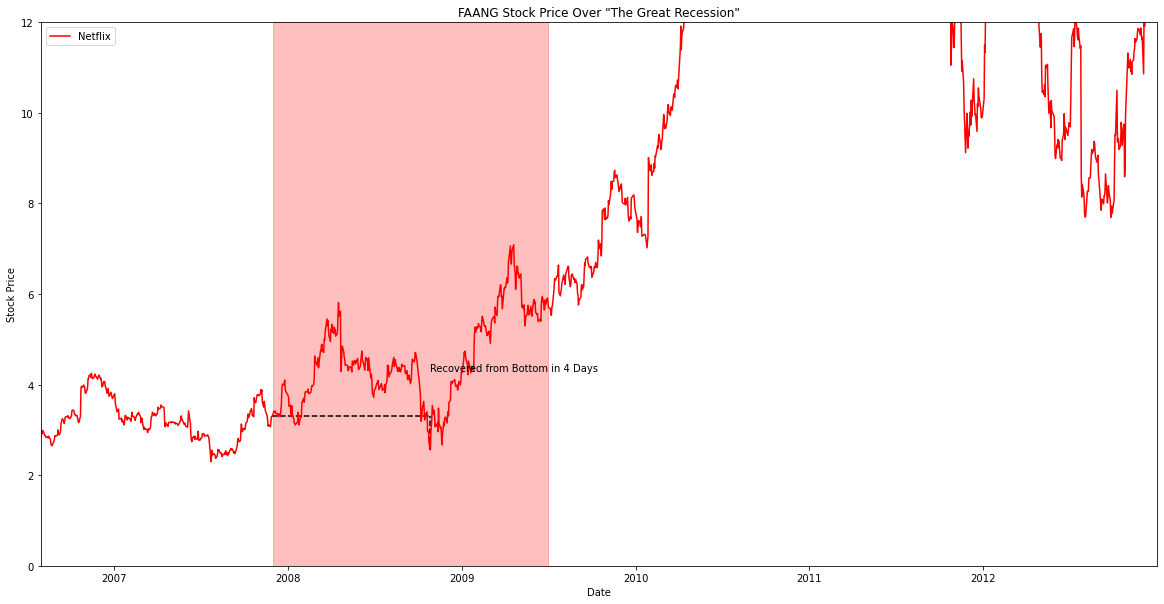

In [85]:
# Zoom-in just to Netflix

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")

plt.xlim(datetime(2006,8,1), datetime(2012,12,31))
plt.ylim(0, 12)

# Add bounds for The Gulf Ware Recession period
plt.axvspan(datetime(1990,7,1), datetime(1991,3,31), color='red', alpha=0.25)

# Add bounds for The Dot-Bomb Recession period
plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), color='red', alpha=0.25)

# Add bounds for The Great Recession period
plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), color='red', alpha=0.25)

# Add horizontal line for Netflix pre-recession price to recovery date
plt.hlines(merged_df["Netflix_Adj_Close"][merged_df.Date == datetime(2007,11,30)], xmin=datetime(2007,11,30), 
           xmax=netflix_recoverdate_gr, colors='black', linestyle="dashed")

# Add vertical line for Netflix bottom
plt.vlines(netflix_bottomdate_gr, netflix_bottomprice_gr, netflix_preprice_gr, colors='black', linestyle="dashed")

# Add text on how long recovery time took
plt.annotate("Recovered from Bottom in 4 Days", xy = (netflix_bottomdate_gr, netflix_preprice_gr + 1))

plt.title('FAANG Stock Price Over "The Great Recession"')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

## The Dot-Bomb Recession: March 2001–November 2001

In [86]:
# Find bottom price and date for FAANG stocks over Dot-Bomb Recession
# Only Amazon and Apple were public over this period

# Find bottom price and date for Amazon over Dot-Bomb Recession
amazon_bottomprice_dbr = merged_df["Amazon_Adj_Close"][
    (merged_df.Date >= datetime(2001,2,28)) & (merged_df.Date <= datetime(2001,11,30))].min()

amazon_bottomdate_dbr = merged_df["Date"][(merged_df["Amazon_Adj_Close"] == amazon_bottomprice_dbr) &
    (merged_df.Date >= datetime(2001,2,28)) & (merged_df.Date <= datetime(2001,11,30))].values
amazon_bottomdate_dbr = amazon_bottomdate_dbr[0]

# Find bottom price and date for Apple over Dot-Bomb Recession
apple_bottomprice_dbr = merged_df["Apple_Adj_Close"][
    (merged_df.Date >= datetime(2001,2,28)) & (merged_df.Date <= datetime(2001,11,30))].min()

apple_bottomdate_dbr = merged_df["Date"][(merged_df["Apple_Adj_Close"] == apple_bottomprice_dbr) &
    (merged_df.Date >= datetime(2001,2,28)) & (merged_df.Date <= datetime(2001,11,30))].values
apple_bottomdate_dbr = apple_bottomdate_dbr[0]

print("Amazon bottom: ", amazon_bottomprice_dbr, amazon_bottomdate_dbr)
print("Apple bottom: ", apple_bottomprice_dbr, apple_bottomdate_dbr)

Amazon bottom:  5.97 2001-09-28T00:00:00.000000000
Apple bottom:  0.23 2001-09-26T00:00:00.000000000


In [87]:
# Find dates where FAANG stocks recovered from bottom to pre-recession price
# Only Amazon and Apple were public over this period

# Find date where Amazon recovered to pre-recession price
amazon_preprice_dbr =  merged_df["Amazon_Adj_Close"][merged_df.Date == datetime(2001,2,28)].values
amazon_preprice_dbr = amazon_preprice_dbr[0]

amazon_recoverdate_dbr = merged_df["Date"][
    (merged_df["Amazon_Adj_Close"] >= amazon_preprice_dbr) & (merged_df["Date"] > amazon_bottomdate_dbr)].min()

# Find date where Apple recovered to pre-recession price
apple_preprice_dbr =  merged_df["Apple_Adj_Close"][merged_df.Date == datetime(2001,2,28)].values
apple_preprice_dbr = apple_preprice_dbr[0]

apple_recoverdate_dbr = merged_df["Date"][
    (merged_df["Apple_Adj_Close"] >= apple_preprice_dbr) & (merged_df["Date"] > apple_bottomdate_dbr)].min()

print("Amazon recover date: ", amazon_recoverdate_dbr)
print("Apple recover date: ", apple_recoverdate_dbr)

Amazon recover date:  2001-11-26 00:00:00
Apple recover date:  2001-10-12 00:00:00


In [88]:
# Calc time from stock bottom to recovery for FAANG stocks
# Only Amazon and Apple were public over this period

amazon_recovertime_dbr = amazon_recoverdate_dbr - amazon_bottomdate_dbr
apple_recovertime_dbr = apple_recoverdate_dbr - apple_bottomdate_dbr

print("Amazon recover time: ", amazon_recovertime_dbr)
print("Apple recover time: ", apple_recovertime_dbr)

Amazon recover time:  59 days 00:00:00
Apple recover time:  16 days 00:00:00


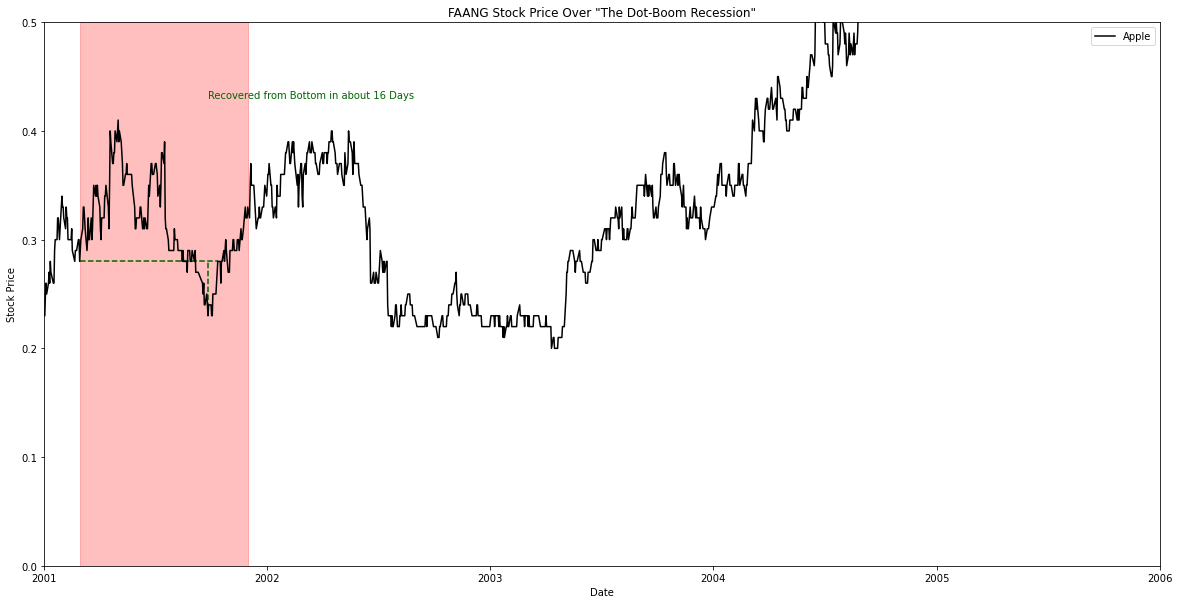

In [89]:
# Zoom-in just to Apple

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
plt.xlim(datetime(2001,1,1), datetime(2006,1,1))
plt.ylim(0, 0.5)

# Add bounds for The Gulf Ware Recession period
plt.axvspan(datetime(1990,7,1), datetime(1991,3,31), color='red', alpha=0.25)

# Add bounds for The Dot-Bomb Recession period
plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), color='red', alpha=0.25)

# Add bounds for The Great Recession period
plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), color='red', alpha=0.25)

# Add horizontal line for Apple pre-recession price to recovery date
plt.hlines(merged_df["Apple_Adj_Close"][merged_df.Date == datetime(2001,2,28)], xmin=datetime(2001,2,28), 
           xmax=apple_recoverdate_dbr, colors='darkgreen', linestyle="dashed")

# Add vertical line for Apple bottom
plt.vlines(apple_bottomdate_dbr, apple_bottomprice_dbr, apple_preprice_dbr, colors='darkgreen', linestyle="dashed")

# Add text on how long recovery time took
plt.annotate("Recovered from Bottom in about 16 Days", xy = (apple_bottomdate_dbr, apple_preprice_dbr + 0.15),
            color="darkgreen")

plt.title('FAANG Stock Price Over "The Dot-Boom Recession"')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

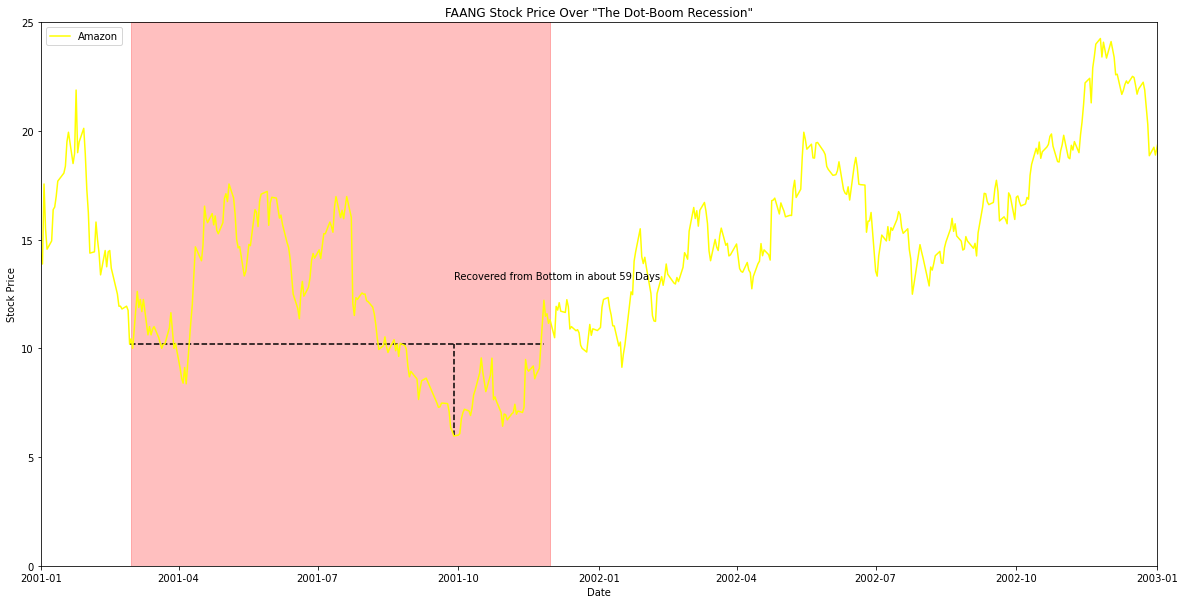

In [90]:
# Zoom-in just to Amazon

plt.figure(figsize=(20,10))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.xlim(datetime(2001,1,1), datetime(2003,1,1))
plt.ylim(0, 25)

# Add bounds for The Gulf Ware Recession period
plt.axvspan(datetime(1990,7,1), datetime(1991,3,31), color='red', alpha=0.25)

# Add bounds for The Dot-Bomb Recession period
plt.axvspan(datetime(2001,3,1), datetime(2001,11,30), color='red', alpha=0.25)

# Add bounds for The Great Recession period
plt.axvspan(datetime(2007,12,1), datetime(2009,6,30), color='red', alpha=0.25)

# Add horizontal line for Amazon pre-recession price to recovery date
plt.hlines(merged_df["Amazon_Adj_Close"][merged_df.Date == datetime(2001,2,28)], xmin=datetime(2001,2,28), 
           xmax=amazon_recoverdate_dbr, colors='black', linestyle="dashed")

# Add vertical line for Amazon bottom
plt.vlines(amazon_bottomdate_dbr, amazon_bottomprice_dbr, amazon_preprice_dbr, colors='black', 
           linestyle="dashed")

# Add text on how long recovery time took
plt.annotate("Recovered from Bottom in about 59 Days", xy = (amazon_bottomdate_dbr, amazon_preprice_dbr + 3),
            color = "black")

plt.title('FAANG Stock Price Over "The Dot-Boom Recession"')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()

#### Insights for Question 4: 
1. We analyzed FAANG stock prices over recessions where we have data (The Dot-Bomb Recession and The Great Recession).
2. We measured the pre-recession stock price, the bottom price during the recession, and the date when the stock gets back to the pre-recession price from the bottom.
- An alternate way we could have measured was by looking at the highest price from day before recession to the bottom during recession, look at the bottom price during the recession, and the date the stock gets back to that highest price. Based on visualizing this on the charts, this would not have changed our conclusions.
3. All FAANG stocks have recovered to their pre-recession price! Majority recovered within 1 year (Google took 3.8 years over The Great Recession).

# 5) How do FAANG stocks perform during rising interest rate periods?

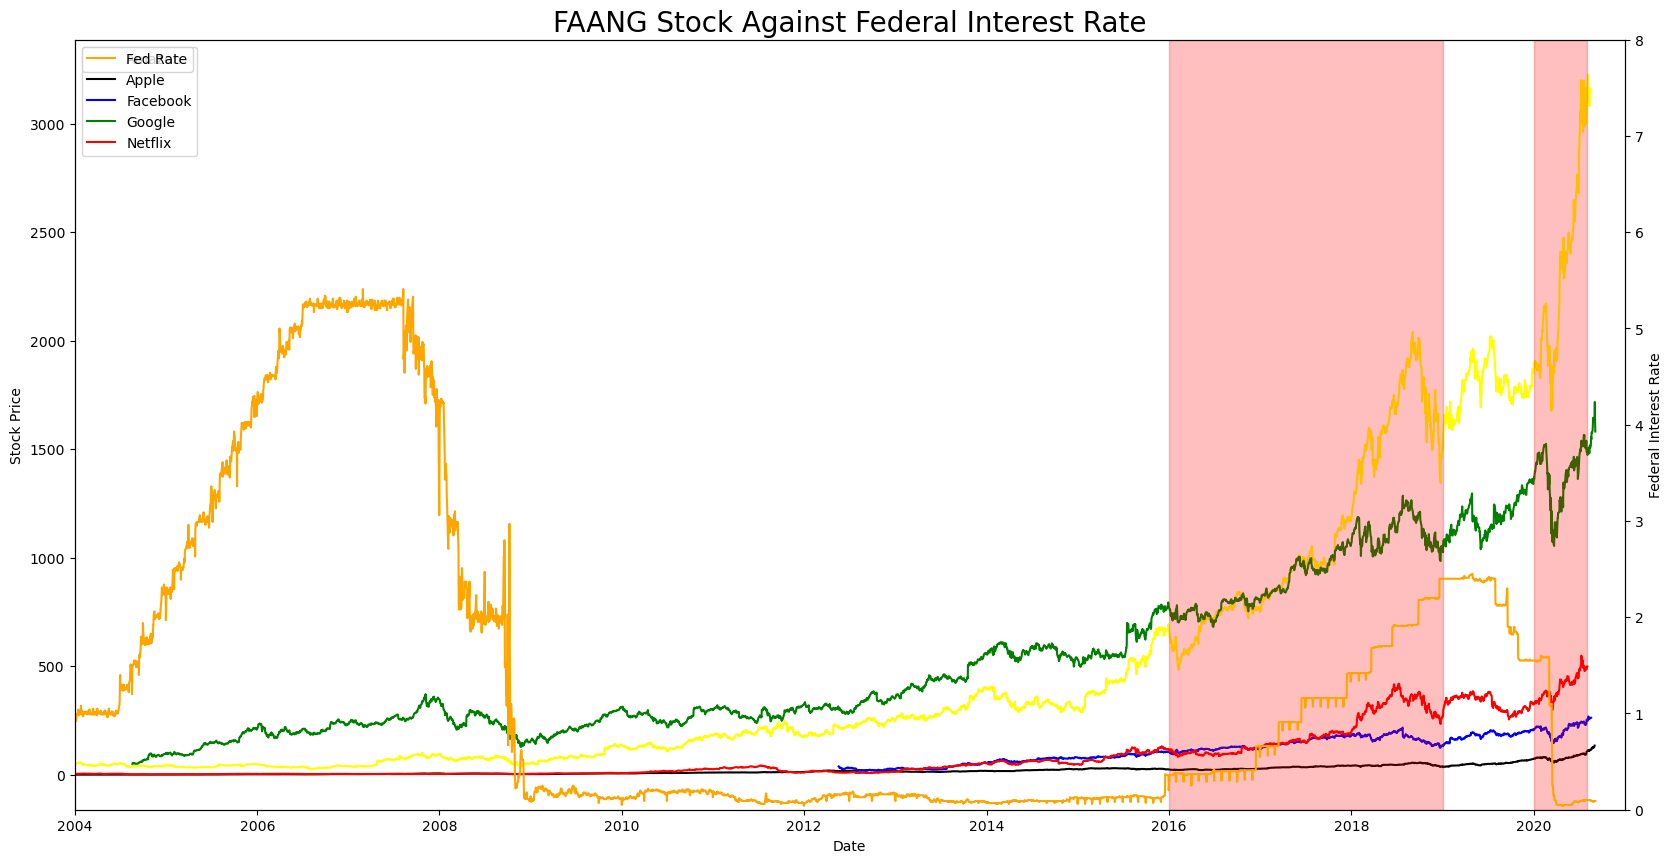

In [6]:
# Zoom-in to 2004+ to see all stocks better (most FAANG stocks went public in 2000s)
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

ax1.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
ax1.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
ax1.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
ax1.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
ax1.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")

ax2.plot(merged_df.Date, merged_df.Int_Rate, label="Fed Rate", color = "orange")
ax2.set_ylim([0, 8])

#Highlight Areas of Interest
#Rising interest rate
plt.axvspan(datetime(2016,1,1), datetime(2019,1,1), color='red', alpha=0.25)
#Falling interest rate
plt.axvspan(datetime(2020,1,1), datetime(2020,7,31), color='red', alpha=0.25)

plt.title("FAANG Stock Against Federal Interest Rate", fontsize=20)

# Set the labels for the x- and y-axes
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax2.set_ylabel('Federal Interest Rate')

plt.xlim(datetime(2004,1,1), datetime(2020,12,31))
ax1.legend()
ax2.legend()


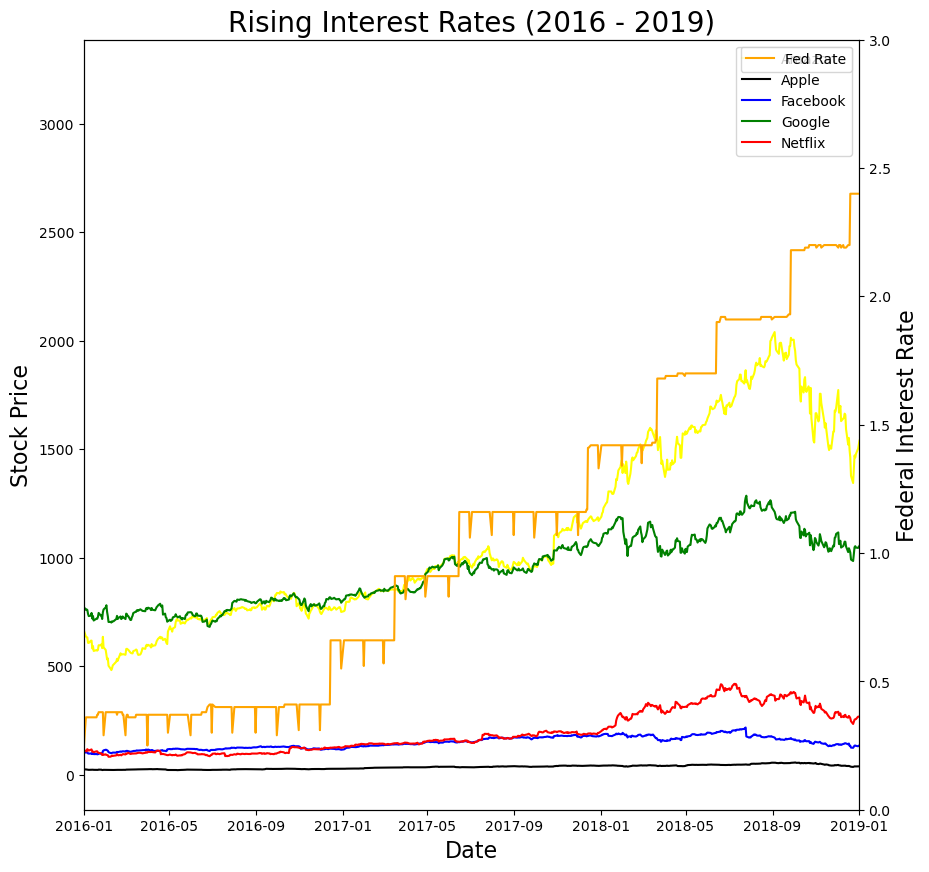

In [7]:
#Lets zoom in on the 2016-2019 period
fig, ax1 = plt.subplots(figsize=(10,10))
ax2 = ax1.twinx()

ax1.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
ax1.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
ax1.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
ax1.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
ax1.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")


ax2.plot(merged_df.Date, merged_df.Int_Rate, label="Fed Rate", color = "orange")
ax2.set_ylim([0, 3])

plt.title("Rising Interest Rates (2016 - 2019)", fontsize=20)

# Set the labels for the x- and y-axes
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Stock Price', fontsize=16)
ax2.set_ylabel('Federal Interest Rate', fontsize=16)

plt.xlim(datetime(2016,1,1), datetime(2019,1,1))
ax1.legend()
ax2.legend()

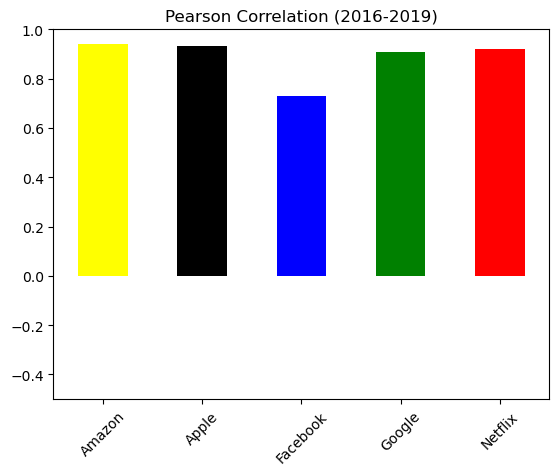

In [8]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient for each company during this period
Amazon_r, Amazon_p = pearsonr(merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Amazon_Adj_Close'], 
                              merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Int_Rate']
                             )

Apple_r, Apple_p = pearsonr(merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Apple_Adj_Close'], 
                            merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Int_Rate']
                            )

Facebook_r, Facebook_p = pearsonr(merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Facebook_Adj_Close'], 
                                 merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Int_Rate']
                                 )

Google_r, Google_p = pearsonr(merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Google_Adj_Close'], 
                               merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Int_Rate']
                              )

Netflix_r, Netflix_p = pearsonr(merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Netflix_Adj_Close'], 
                              merged_df[(merged_df['Date'] > '2016-1-1') & (merged_df['Date'] < '2019-1-1')]['Int_Rate']
                             )

#Save all the values into a data frame
stocks_pvalues = pd.DataFrame([['Amazon', Amazon_r, Amazon_p], 
                               ['Apple', Apple_r, Apple_p], 
                               ['Facebook', Facebook_r, Facebook_p],
                               ['Google', Google_r, Google_p],
                               ['Netflix', Netflix_r, Netflix_p]], 
                              columns=['Company','Pearson_Correlation', 'p-value'])

# Plot the dataframe as a bar chart
ax = stocks_pvalues.Pearson_Correlation.plot(kind='bar', color = ['yellow','black','blue','green','red'])

# Customize the plot
ax.set_xticklabels(stocks_pvalues['Company'], rotation=45)
ax.set_ylim(-.5,1)
ax.set_title('Pearson Correlation (2016-2019)')

plt.show()

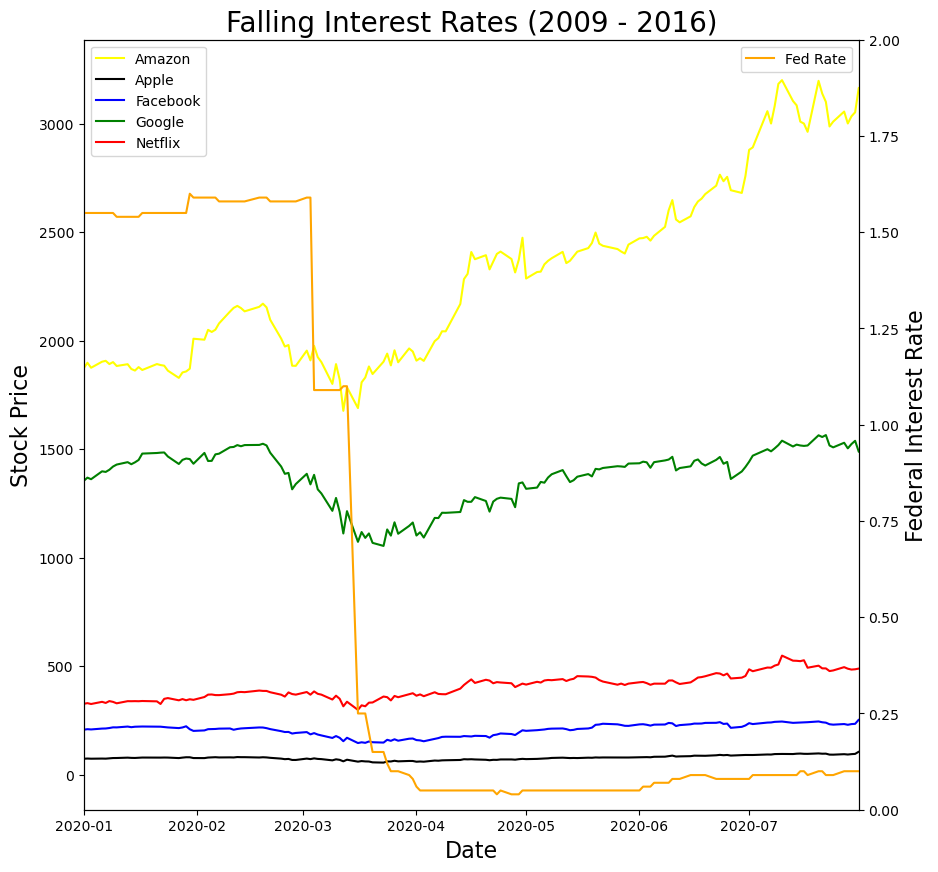

In [9]:
#Lets zoom in on everything after 2020
fig, ax1 = plt.subplots(figsize=(10,10))
ax2 = ax1.twinx()

ax1.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
ax1.plot(merged_df.Date, merged_df.Apple_Adj_Close, label="Apple", color="black")
ax1.plot(merged_df.Date, merged_df.Facebook_Adj_Close, label="Facebook", color="blue")
ax1.plot(merged_df.Date, merged_df.Google_Adj_Close, label="Google", color="green")
ax1.plot(merged_df.Date, merged_df.Netflix_Adj_Close, label="Netflix", color="red")

ax2.plot(merged_df.Date, merged_df.Int_Rate, label="Fed Rate", color = "orange")
ax2.set_ylim([0, 2])

plt.title("Falling Interest Rates (2009 - 2016)", fontsize=20)

# Set the labels for the x- and y-axes
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Stock Price', fontsize=16)
ax2.set_ylabel('Federal Interest Rate', fontsize=16)

plt.xlim(datetime(2020,1,1), datetime(2020,7,31))
ax1.legend()
ax2.legend()

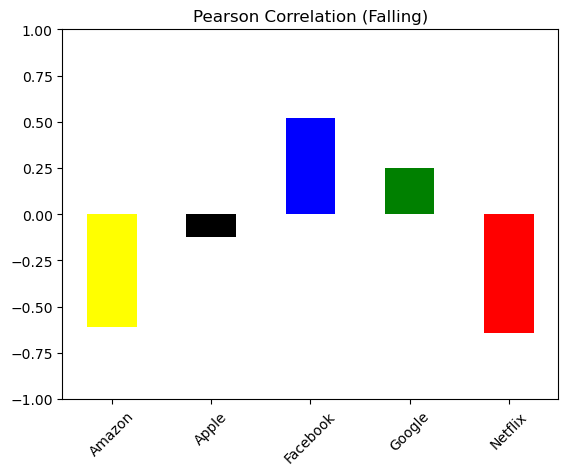

In [10]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient for each company during this period
Amazon_r, Amazon_p = pearsonr(merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Amazon_Adj_Close'], 
                              merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Int_Rate']
                             )

Apple_r, Apple_p = pearsonr(merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Apple_Adj_Close'], 
                            merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Int_Rate']
                            )

Facebook_r, Facebook_p = pearsonr(merged_df[(merged_df['Date'] > '2020-5-18') & (merged_df['Date'] < '2020-7-31')]['Facebook_Adj_Close'], 
                                 merged_df[(merged_df['Date'] > '2020-5-18') & (merged_df['Date'] < '2020-7-31')]['Int_Rate']
                                 )

Google_r, Google_p = pearsonr(merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Google_Adj_Close'], 
                               merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Int_Rate']
                              )

Netflix_r, Netflix_p = pearsonr(merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Netflix_Adj_Close'], 
                              merged_df[(merged_df['Date'] > '2020-1-1') & (merged_df['Date'] < '2020-7-31')]['Int_Rate']
                             )

#Save all the values into a data frame
stocks_pvalues = pd.DataFrame([['Amazon', Amazon_r, Amazon_p], 
                               ['Apple', Apple_r, Apple_p], 
                               ['Facebook', Facebook_r, Facebook_p],
                               ['Google', Google_r, Google_p],
                               ['Netflix', Netflix_r, Netflix_p]], 
                              columns=['Company','Pearson_Correlation', 'p-value'])

# Plot the dataframe as a bar chart
ax = stocks_pvalues.Pearson_Correlation.plot(kind='bar', color = ['yellow','black','blue','green','red'])

# Customize the plot
ax.set_xticklabels(stocks_pvalues['Company'], rotation=45)
ax.set_ylim(-1,1)
ax.set_title('Pearson Correlation (Falling)')

plt.show()

#### Insights for Question 5: 
1. Rising interest rates see every company gaining stock value. Could be cause by a ‘hot’ market where the federal interest rate is trying to slow down debt   
   accumulation.
2. Interest rate could be acting as a slow break to the prices which eventually correct once the market cools down. 
3. Performance during a drop in interest rates sees the stocks split along those reliant on marketing and those who are not. 
4. Amazon, Apple, and Netflix who all sell directly to consumers appear to benefit from increased consumer spending
5. Facebook and Google appear to suffer, perhaps as a result of fewer marketing dollars being invested due to good sales



# 6) What dates/time periods does most FAANG stock activity occur?

#### "Exploring Trade Volume Patterns":


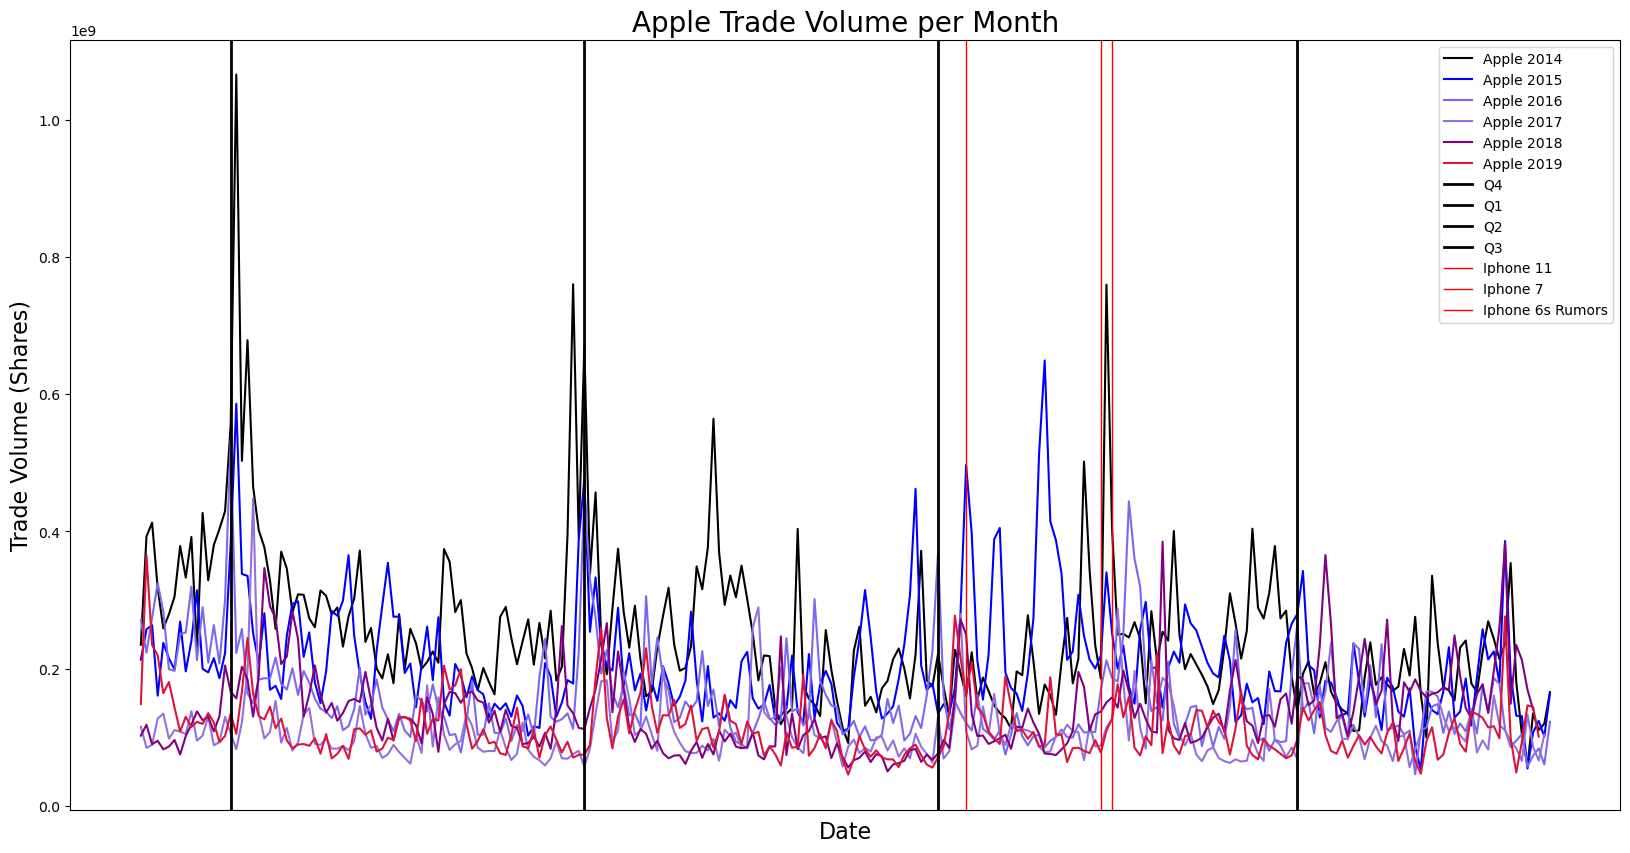

In [11]:
#Set the figure size
fig, ax = plt.subplots(figsize=(20,10))

#Plot data for the years
ax.plot(merged2014_df.Date.dt.strftime('%m-%d'), merged2014_df.Apple_Vol, 
        label="Apple 2014", color="black")

ax.plot(merged2014_df.Date.dt.strftime('%m-%d'), merged2015_df.Apple_Vol, 
        label="Apple 2015", color="blue")

ax.plot(merged2014_df.Date.dt.strftime('%m-%d'), merged2016_df.Apple_Vol, 
        label="Apple 2016", color="mediumslateblue")

ax.plot(merged2014_df.Date[:-1].dt.strftime('%m-%d'), merged2017_df.Apple_Vol, 
        label="Apple 2017", color="mediumpurple")

ax.plot(merged2014_df.Date[:-3].dt.strftime('%m-%d'), merged2018_df.Apple_Vol, 
        label="Apple 2018", color="purple")

ax.plot(merged2014_df.Date[:-2].dt.strftime('%m-%d'), merged2019_df.Apple_Vol, 
        label="Apple 2019", color="crimson")

#Plot quarterly earnings calls
ax.axvline('01-27',linewidth=2, color='black', label='Q4')
ax.axvline('04-28',linewidth=2, color='black', label='Q1')
ax.axvline('07-28',linewidth=2, color='black', label='Q2')
ax.axvline('10-27',linewidth=2, color='black', label='Q3')

#Iphone and Major releases
ax.axvline('09-10',linewidth=1, color='red', label='Iphone 11')
ax.axvline('09-08',linewidth=1, color='red', label='Iphone 7')
ax.axvline('08-04',linewidth=1, color='red', label='Iphone 6s Rumors')

#Set title and axes labels
plt.title("Apple Trade Volume per Month", fontsize=20)
ax.set_xlabel("Date", fontsize=16)
ax.set_ylabel('Trade Volume (Shares)', fontsize=16)

#Remove X-Axis as dates don't line up 1-1 anyways
plt.xticks([])

#Show the legend
ax.legend()

#### "Sell in May":
1. There is a term people refer to as "Sell in May" in the stock market, where people sell stock around May to pay for summer vacations, etc.
2. We wanted to look into this period over the years to see if there is any actual trends here.
3. Using Amazon over the past 5 years for the analysis.

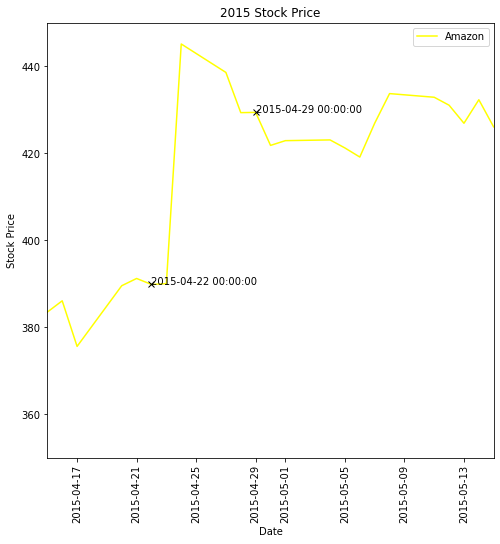

In [ ]:
# Plot 2015 Amazon "Sell in May" trend

plt.figure(figsize=(8,8))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.xlim(datetime(2015,4,15), datetime(2015,5,15))
plt.ylim(350, 450)
plt.plot(datetime(2015,4,22), 
         merged_df[merged_df["Date"]==datetime(2015,4,22)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2015,4,22), 
         merged_df[merged_df["Date"]==datetime(2015,4,22)]["Amazon_Adj_Close"].values[0], 
         datetime(2015,4,22), color="black")
plt.plot(datetime(2015,4,29), 
         merged_df[merged_df["Date"]==datetime(2015,4,29)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2015,4,29), 
         merged_df[merged_df["Date"]==datetime(2015,4,29)]["Amazon_Adj_Close"].values[0], 
         datetime(2015,4,29), color="black")
plt.title("2015 Stock Price")
plt.xlabel("Date")
plt.xticks(rotation = "vertical")
plt.ylabel("Stock Price")
plt.legend()

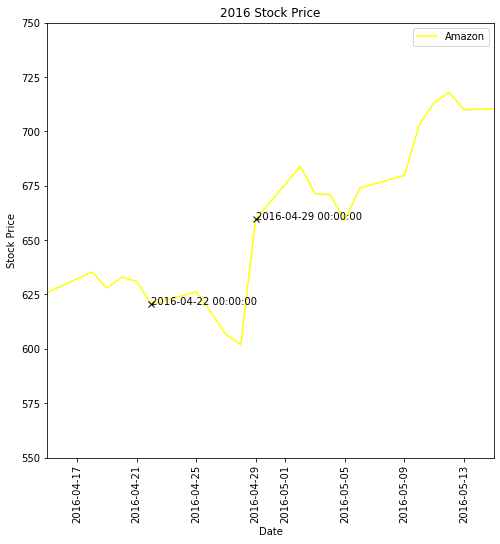

In [275]:
# Plot 2016 Amazon "Sell in May" trend

plt.figure(figsize=(8,8))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.xlim(datetime(2016,4,15), datetime(2016,5,15))
plt.ylim(550, 750)

# In initial plotting, identified trend where stock price runs up right before May starts.
# It seems that if you bought on 4-22 and sold on 4-29 (or closest business day), you always made money
# over the past 5 years. Plotting this on the charts:
plt.plot(datetime(2016,4,22), 
         merged_df[merged_df["Date"]==datetime(2016,4,22)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2016,4,22), 
         merged_df[merged_df["Date"]==datetime(2016,4,22)]["Amazon_Adj_Close"].values[0], 
         datetime(2016,4,22), color="black")
plt.plot(datetime(2016,4,29), 
         merged_df[merged_df["Date"]==datetime(2016,4,29)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2016,4,29), 
         merged_df[merged_df["Date"]==datetime(2016,4,29)]["Amazon_Adj_Close"].values[0], 
         datetime(2016,4,29), color="black")
plt.title("2016 Stock Price")
plt.xlabel("Date")
plt.xticks(rotation = "vertical")
plt.ylabel("Stock Price")
plt.legend()

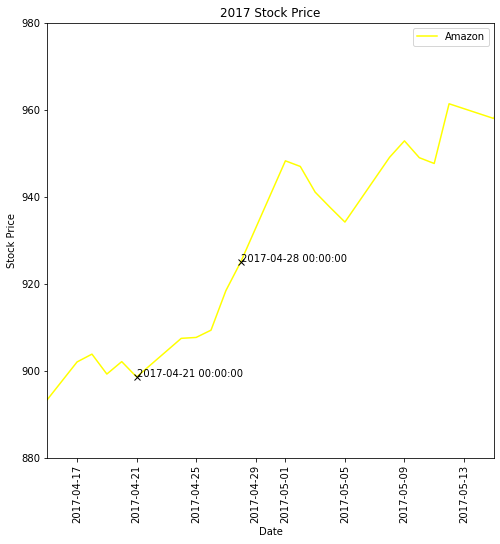

In [276]:
# Plot 2017 Amazon "Sell in May" trend

plt.figure(figsize=(8,8))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.xlim(datetime(2017,4,15), datetime(2017,5,15))
plt.ylim(880, 980)

# In initial plotting, identified trend where stock price runs up right before May starts.
# It seems that if you bought on 4-22 and sold on 4-29 (or closest business day), you always made money
# over the past 5 years. Plotting this on the charts:
plt.plot(datetime(2017,4,21), 
         merged_df[merged_df["Date"]==datetime(2017,4,21)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2017,4,21), 
          merged_df[merged_df["Date"]==datetime(2017,4,21)]["Amazon_Adj_Close"].values[0], 
          datetime(2017,4,21), color="black")
plt.plot(datetime(2017,4,28), 
         merged_df[merged_df["Date"]==datetime(2017,4,28)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2017,4,28), 
         merged_df[merged_df["Date"]==datetime(2017,4,28)]["Amazon_Adj_Close"].values[0], 
         datetime(2017,4,28), color="black")
plt.title("2017 Stock Price")
plt.xlabel("Date")
plt.xticks(rotation = "vertical")
plt.ylabel("Stock Price")
plt.legend()

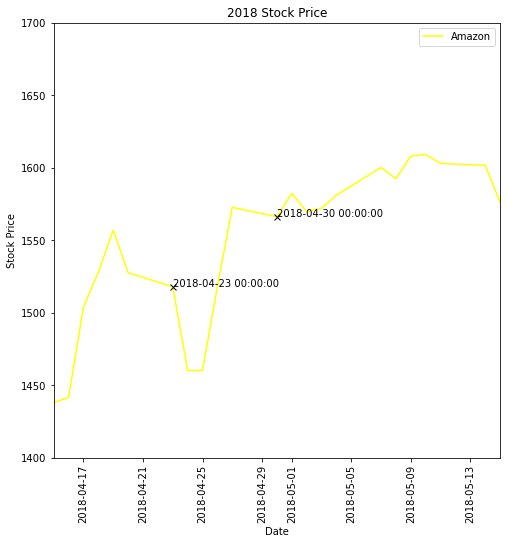

In [277]:
# Plot 2018 Amazon "Sell in May" trend

plt.figure(figsize=(8,8))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.xlim(datetime(2018,4,15), datetime(2018,5,15))
plt.ylim(1400, 1700)

# In initial plotting, identified trend where stock price runs up right before May starts.
# It seems that if you bought on 4-22 and sold on 4-29 (or closest business day), you always made money
# over the past 5 years. Plotting this on the charts:
plt.plot(datetime(2018,4,23), 
         merged_df[merged_df["Date"]==datetime(2018,4,23)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2018,4,23), 
         merged_df[merged_df["Date"]==datetime(2018,4,23)]["Amazon_Adj_Close"].values[0], 
         datetime(2018,4,23), color="black")
plt.plot(datetime(2018,4,30), 
         merged_df[merged_df["Date"]==datetime(2018,4,30)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2018,4,30), 
         merged_df[merged_df["Date"]==datetime(2018,4,30)]["Amazon_Adj_Close"].values[0], 
         datetime(2018,4,30), color="black")
plt.title("2018 Stock Price")
plt.xlabel("Date")
plt.xticks(rotation = "vertical")
plt.ylabel("Stock Price")
plt.legend()

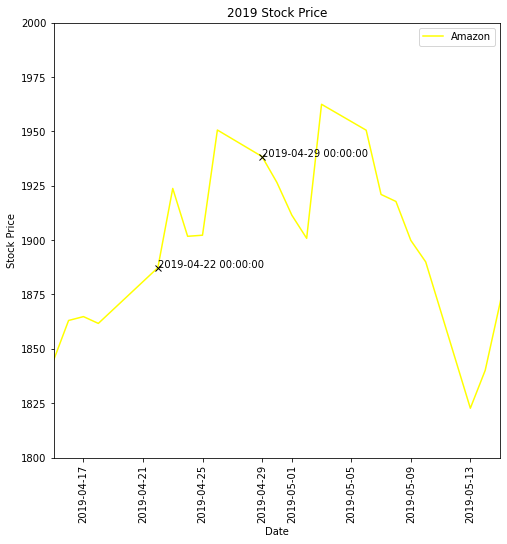

In [278]:
# Plot 2019 Amazon "Sell in May" trend

plt.figure(figsize=(8,8))
plt.plot(merged_df.Date, merged_df.Amazon_Adj_Close, label="Amazon", color="yellow")
plt.xlim(datetime(2019,4,15), datetime(2019,5,15))
plt.ylim(1800, 2000)

# In initial plotting, identified trend where stock price runs up right before May starts.
# It seems that if you bought on 4-22 and sold on 4-29 (or closest business day), you always made money
# over the past 5 years. Plotting this on the charts:
plt.plot(datetime(2019,4,22), 
         merged_df[merged_df["Date"]==datetime(2019,4,22)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2019,4,22), 
         merged_df[merged_df["Date"]==datetime(2019,4,22)]["Amazon_Adj_Close"].values[0], 
         datetime(2019,4,22), color="black")
plt.plot(datetime(2019,4,29), 
         merged_df[merged_df["Date"]==datetime(2019,4,29)]["Amazon_Adj_Close"].values[0], 
         marker ="x", color="black")
plt.text(datetime(2019,4,29), 
         merged_df[merged_df["Date"]==datetime(2019,4,29)]["Amazon_Adj_Close"].values[0], 
         datetime(2019,4,29), color="black")
plt.title("2019 Stock Price")
plt.xlabel("Date")
plt.xticks(rotation = "vertical")
plt.ylabel("Stock Price")
plt.legend()

#### Insights for Question 6: 
1. There is a term people refer to as "Sell in May" in the stock market, where people sell stock around May to pay for summer vacations, etc.
2. We wanted to look into this period over the years to see if there is any actual trends here.
3. Used Amazon over the past 5 years for the analysis.
4. In initial plotting, identified a recurring trend where the stock price runs up right before May starts.
5. It looks like if you would have bought on 4-22 and sold on 4-29 (or closes business day), you would have always made money over the past 5 years!